## Connect to Google Drive + Load in libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install praw pandas vaderSentiment textblob --quiet

In [3]:
import praw

1. Specify the full path to the file

In [4]:
file_fold = '/content/drive/Shareddrives/CSC 5541/Final Project/Annotation/'

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

MindLinc (Mindful Language Understanding for Interventions and Context):


Comparing different models (Textblob/vader, trained bert and Mindlinc across different subsets of data)

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np

## Create Dataset

In [79]:
df_gender = pd.read_excel(file_fold + 'combined_dataset_Final_Gender.xlsx')
df_none = pd.read_excel(file_fold + 'combined_dataset_Final_None.xlsx')
df_queer = pd.read_excel(file_fold + 'combined_dataset_Final_Queer.xlsx')
df_race = pd.read_excel(file_fold + 'combined_dataset_Final_Race.xlsx')

In [80]:
# no uppercase
df_gender.columns = df_gender.columns.str.strip().str.lower()
df_none.columns = df_none.columns.str.strip().str.lower()
df_queer.columns = df_queer.columns.str.strip().str.lower()
df_race.columns = df_race.columns.str.strip().str.lower()

In [81]:
df_none = df_none[
    df_none['label_mental_health'].isin([0, 1])
].copy()

df_gender = df_gender[
    df_gender['label_gender_identity'].isin([0, 1]) &
    df_gender['label_mental_health'].isin([0, 1])
].copy()

df_queer = df_queer[
    df_queer['label_queer_identity'].isin([0, 1]) &
    df_queer['label_mental_health'].isin([0, 1])
].copy()

df_race = df_race[
    df_race['label_racial_identity'].isin([0, 1]) &
    df_race['label_mental_health'].isin([0, 1])
].copy()


2. Check the column names of each dataset to make sure they have the same structure

In [82]:
print("Gender DataFrame column name:", df_gender.columns.tolist())
print("None DataFrame  column name:", df_none.columns.tolist())
print("Queer DataFrame  column name:", df_queer.columns.tolist())
print("Race DataFrame  column name:", df_race.columns.tolist())

Gender DataFrame column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments']
None DataFrame  column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments']
Queer DataFrame  column name: ['author', 'created_utc', 'score', 'selftext', 'subreddit', '

3. Merge datasets

In [83]:
# First check the size of each dataset
print(f"Gender dataset: {df_gender.shape[0]} rows, {df_gender.shape[1]} columns")
print(f"None dataset: {df_none.shape[0]} rows, {df_none.shape[1]} columns")
df_gender['Unnamed: 24'] = np.nan
df_none['Unnamed: 24'] = np.nan
print(f"Queer dataset: {df_queer.shape[0]} rows, {df_queer.shape[1]} columns")
print(f"Race dataset: {df_race.shape[0]} rows, {df_race.shape[1]} columns")

Gender dataset: 286 rows, 24 columns
None dataset: 959 rows, 24 columns
Queer dataset: 591 rows, 25 columns
Race dataset: 102 rows, 25 columns


In [84]:
# For details1
# Rename column 11 to 'details_MH'
df_gender.columns.values[11] = 'details_MH'
df_none.columns.values[11] = 'details_MH'
df_queer.columns.values[11] = 'details_MH'
df_race.columns.values[11] = 'details_MH'

# Rename column 15 to 'details_gender'
df_gender.columns.values[15] = 'details_gender'
df_none.columns.values[15] = 'details_gender'
df_queer.columns.values[15] = 'details_gender'
df_race.columns.values[15] = 'details_gender'


# no uppercase
df_gender.columns = df_gender.columns.str.strip().str.lower()
df_none.columns = df_none.columns.str.strip().str.lower()
df_queer.columns = df_queer.columns.str.strip().str.lower()
df_race.columns = df_race.columns.str.strip().str.lower()

# Now check if columns are consistent
print(f"Gender columns: {df_gender.columns.tolist()}")
print(f"None columns: {df_none.columns.tolist()}")
print(f"Queer columns: {df_queer.columns.tolist()}")
print(f"Race columns: {df_race.columns.tolist()}")


Gender columns: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
None columns: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
Queer columns: ['author', 'created_utc', 'score', 'selftext', 'subredd

In [85]:
# Merge all datasets
#Drop any duplicates
combined_df = pd.concat([df_gender, df_none, df_queer, df_race], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset=['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp'], keep='first')
print(f"Merged dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")

Merged dataset: 1841 rows, 25 columns


In [88]:
# Cols that need None
cols_to_replace_with_none = ['disorder', 'gender_identity', 'race_identity', 'queer_identity']

# replaces nans with none
combined_df[cols_to_replace_with_none] = combined_df[cols_to_replace_with_none].fillna('None')

# fill rest with 0s
combined_df.fillna(0, inplace=True)

In [89]:
# List of columns to modify
columns_to_lowercase = ['disorder', 'gender_identity', 'race_identity', 'queer_identity']

# Iterate through each column and apply .str.lower()
for col in columns_to_lowercase:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].str.lower()


In [90]:
combined_df.to_csv(file_fold + 'combined_data_FINAL.xlsx', index=False)

## VaderSentiment

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
file_fold

'/content/drive/Shareddrives/CSC 5541/Final Project/Annotation/'

In [93]:
!pip install openpyxl
import openpyxl
import pandas as pd

In [94]:
# Make sure openpyxl is installed
!pip install openpyxl

# Import pandas
import pandas as pd

# Use the correct file path and specify the engine as 'openpyxl'
#combined_df = pd.read_excel(file_fold + 'combined_data_FINAL.xlsx', engine='openpyxl')

# Print the column names and shape of the combined dataframe
print("Combined DataFrame column names:", combined_df.columns.tolist())
print(f"Merged dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")

Combined DataFrame column names: ['author', 'created_utc', 'score', 'selftext', 'subreddit', 'title', 'timestamp', 'label_mental_health', 'disorder', 'diagnoised', 'seekinghelp_copingmechanisms', 'details_mh', 'label_gender_identity', 'matched_gender_word', 'gender_identity', 'details_gender', 'label_racial_identity', 'matched_racial_word', 'race_identity', 'race_identity_specific', 'label_queer_identity', 'matched_queer_word', 'queer_identity', 'extra_comments', 'unnamed: 24']
Merged dataset: 1841 rows, 25 columns


4. Text cleaning function

In [95]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'&gt;.*?\n', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s.,!?;:\-\'\"()]', '', text)
        return text.strip()
    return ""

In [96]:
text_column = 'selftext'
if text_column in combined_df.columns:

    combined_df['cleaned_text'] = combined_df[text_column].apply(clean_text)


    combined_df['text_length'] = combined_df['cleaned_text'].apply(len)
    print("Text length statistics:")
    print(combined_df['text_length'].describe())

Text length statistics:
count     1841.000000
mean       998.475285
std       1007.934861
min          0.000000
25%        346.000000
50%        718.000000
75%       1308.000000
max      11476.000000
Name: text_length, dtype: float64


5. Dealing with text length issues
6. Save the preprocessed data

In [97]:
MAX_LENGTH = 3000
combined_df['truncated_text'] = combined_df['cleaned_text'].apply(
        lambda x: x[:MAX_LENGTH] if len(x) > MAX_LENGTH else x
    )

combined_df.to_csv(file_fold + 'preprocessed_mental_health_data.csv', index=False)
print("Data preprocessing is completed and saved")

Data preprocessing is completed and saved


Sentiment Analysis

In [98]:
# Use the entire dataset (no sample size restriction)
full_analysis_df = combined_df.copy()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Store analysis results
results = []

# Ensure the 'cleaned_text' column exists
text_column_for_analysis = 'cleaned_text'

if text_column_for_analysis not in full_analysis_df.columns:
    print(f"Error: Column '{text_column_for_analysis}' not found in the dataset.")
else:
    # Perform sentiment analysis for each piece of text
    for idx, row in full_analysis_df.iterrows():
        text = row[text_column_for_analysis]

        # Skip empty text
        if pd.isna(text) or text == "":
            continue

        # Perform VADER sentiment analysis
        vader_sentiment = analyzer.polarity_scores(text)

        # Determine sentiment category based on compound score
        if vader_sentiment['compound'] >= 0.05:
            vader_category = 'positive'
        elif vader_sentiment['compound'] <= -0.05:
            vader_category = 'negative'
        else:
            vader_category = 'neutral'

        # Append result
        result_dict = {
            'text_id': idx,
            'vader_compound': vader_sentiment['compound'],
            'vader_category': vader_category,
            # Include demographic information
            #'gender_identity': row.get('gender_identity', ''),
            #'racial_identity': row.get('racial_identity', ''),
            #'queer_identity': row.get('queer_identity', '')

            'gender_identity': row.get('gender_identity', ''),
            'racial_identity': row.get('race_identity', ''),
            'queer_identity': row.get('queer_identity', '')
        }

        results.append(result_dict)

    # Create results DataFrame
    results_df = pd.DataFrame(results)

    # Save the complete results
    results_df.to_csv(file_fold + 'full_sentiment_analysis_results.csv', index=False)

    print(f"Analysis complete. A total of {len(results_df)} texts were processed.")



Analysis complete. A total of 1782 texts were processed.


In [99]:
#print(combined_df.isna().sum())

Sentiment Distribution by Gender Identity

In [100]:
# Sentiment distribution analysis by demographic groups

# 1. Group by gender
if 'gender_identity' in results_df.columns:
    # Use crosstab instead of groupby and value_counts
    gender_cross = pd.crosstab(
        results_df['gender_identity'],
        results_df['vader_category'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by gender:")
    for gender in results_df['gender_identity'].unique():
        if pd.notna(gender) and gender != '':
            subset = results_df[results_df['gender_identity'] == gender]
            sentiment_counts = subset['vader_category'].value_counts()
            total = len(subset)
            print(f"\n{gender} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")

# 2. Group by racial identity
if 'racial_identity' in results_df.columns:
    race_cross = pd.crosstab(
        results_df['racial_identity'],
        results_df['vader_category'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by racial identity:")
    for race in results_df['racial_identity'].unique():
        if pd.notna(race) and race != '':
            subset = results_df[results_df['racial_identity'] == race]
            sentiment_counts = subset['vader_category'].value_counts()
            total = len(subset)
            print(f"\n{race} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")

# 3. Group by queer identity
if 'queer_identity' in results_df.columns:
    queer_cross = pd.crosstab(
        results_df['queer_identity'],
        results_df['vader_category'],
        normalize='index'
    ) * 100

    print("\nSentiment distribution by queer identity:")
    for queer in results_df['queer_identity'].unique():
        if pd.notna(queer) and queer != '':
            subset = results_df[results_df['queer_identity'] == queer]
            sentiment_counts = subset['vader_category'].value_counts()
            total = len(subset)
            print(f"\n{queer} (Total: {total} entries):")
            for sentiment, count in sentiment_counts.items():
                print(f"  {sentiment}: {count} entries ({count/total*100:.1f}%)")



Sentiment distribution by gender:

none (Total: 1391 entries):
  negative: 912 entries (65.6%)
  positive: 435 entries (31.3%)
  neutral: 44 entries (3.2%)

female (Total: 125 entries):
  negative: 85 entries (68.0%)
  positive: 39 entries (31.2%)
  neutral: 1 entries (0.8%)

male (Total: 171 entries):
  negative: 98 entries (57.3%)
  positive: 70 entries (40.9%)
  neutral: 3 entries (1.8%)

likely male (Total: 60 entries):
  negative: 36 entries (60.0%)
  positive: 24 entries (40.0%)

likely female (Total: 31 entries):
  negative: 25 entries (80.6%)
  positive: 6 entries (19.4%)

nonbinary (Total: 3 entries):
  positive: 3 entries (100.0%)

gender queer (Total: 1 entries):
  negative: 1 entries (100.0%)

Sentiment distribution by racial identity:

none (Total: 1704 entries):
  negative: 1109 entries (65.1%)
  positive: 548 entries (32.2%)
  neutral: 47 entries (2.8%)

asian (Total: 37 entries):
  negative: 24 entries (64.9%)
  positive: 12 entries (32.4%)
  neutral: 1 entries (2.7%)


## Visualization

In [61]:
# 4. Visualization of Results

import matplotlib.pyplot as plt

colors = {
    'positive': '#4CAF50',  # Green
    'neutral': '#FF9800',   # Orange
    'negative': '#2196F3'   # Blue
}
# Create a directory to save the figures
import os
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Set Seaborn style for better aesthetics
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

from scipy import stats

### Unified Visualization

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


# Set visual style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create folder for saving figures
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# === Generalized plotting function ===
def plot_sentiment_distribution(df, identity_col, title, filename, simplify_func=None, top_categories=None, rotate_labels=False):
    # Filter rows with non-empty identity
    filtered_df = df[df[identity_col].notna() & (df[identity_col] != '')].copy()

    # Apply simplification function if provided (for queer identities)
    if simplify_func:
        filtered_df['main_identity'] = filtered_df[identity_col].apply(simplify_func)
        identity_used = 'main_identity'
    else:
        identity_used = identity_col

    # Filter to top categories if specified
    if top_categories:
        filtered_df = filtered_df[filtered_df[identity_used].isin(top_categories)]

    # Get counts for label display
    identity_counts = filtered_df[identity_used].value_counts()

    # Create cross-tab of sentiment distribution
    cross_tab = pd.crosstab(
        filtered_df[identity_used],
        filtered_df['vader_category'],
        normalize='index'
    ) * 100

    # Start plotting
    plt.figure(figsize=(14, 8))
    bottom = np.zeros(len(cross_tab))
    x = np.arange(len(cross_tab.index))

    for sentiment in ['positive', 'neutral', 'negative']:
        values = cross_tab[sentiment].values if sentiment in cross_tab.columns else np.zeros(len(cross_tab))
        plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

    # Configure labels and layout
    plt.title(title, fontsize=16)
    plt.xlabel(identity_col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    label_names = [f"{identity}\n(n={identity_counts[identity]})" for identity in cross_tab.index]
    plt.xticks(ticks=x, labels=label_names, rotation=45 if rotate_labels else 0, ha='right' if rotate_labels else 'center')
    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig(figures_dir + filename, dpi=300)
    plt.close()
    print(f"{title} chart saved as {filename}")

# === 1. Gender Identity Plot ===
if 'gender_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='gender_identity',
        title='Sentiment Distribution by Gender Identity Group',
        filename='VADER_gender_sentiment_distribution.png',
        rotate_labels=False
    )

# === 2. Racial Identity Plot ===
if 'racial_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='racial_identity',
        title='Sentiment Distribution by Racial Identity Group',
        filename='VADER_race_sentiment_distribution.png',
        rotate_labels=True
    )

# === 3. Queer Identity Plot ===
if 'queer_identity' in results_df.columns:
    # Simplify queer identities to group similar or ambiguous labels
    def simplify_queer_identity(identity):
        if 'Flag for other' in identity:
            return 'Lesbian'
        if 'Gay?' in identity:
            return 'Gay'
        if 'flag not him' in identity:
            return 'Queer'
        if ',' in identity:
            return identity.split(',')[0].strip()
        return identity

    # Only display these categories in the final chart
    top_queer_categories = ['Transgender', 'Gay', 'Bisexual', 'Queer', 'Lesbian', 'Asexuality']

    plot_sentiment_distribution(
        df=results_df,
        identity_col='queer_identity',
        title='Sentiment Distribution by Queer Identity Group',
        filename='VADER_queer_sentiment_distribution.png',
        simplify_func=simplify_queer_identity,
        top_categories=top_queer_categories,
        rotate_labels=False
    )


Sentiment Distribution by Gender Identity Group chart saved as VADER_gender_sentiment_distribution.png
Sentiment Distribution by Racial Identity Group chart saved as VADER_race_sentiment_distribution.png
Sentiment Distribution by Queer Identity Group chart saved as VADER_queer_sentiment_distribution.png


### Gender

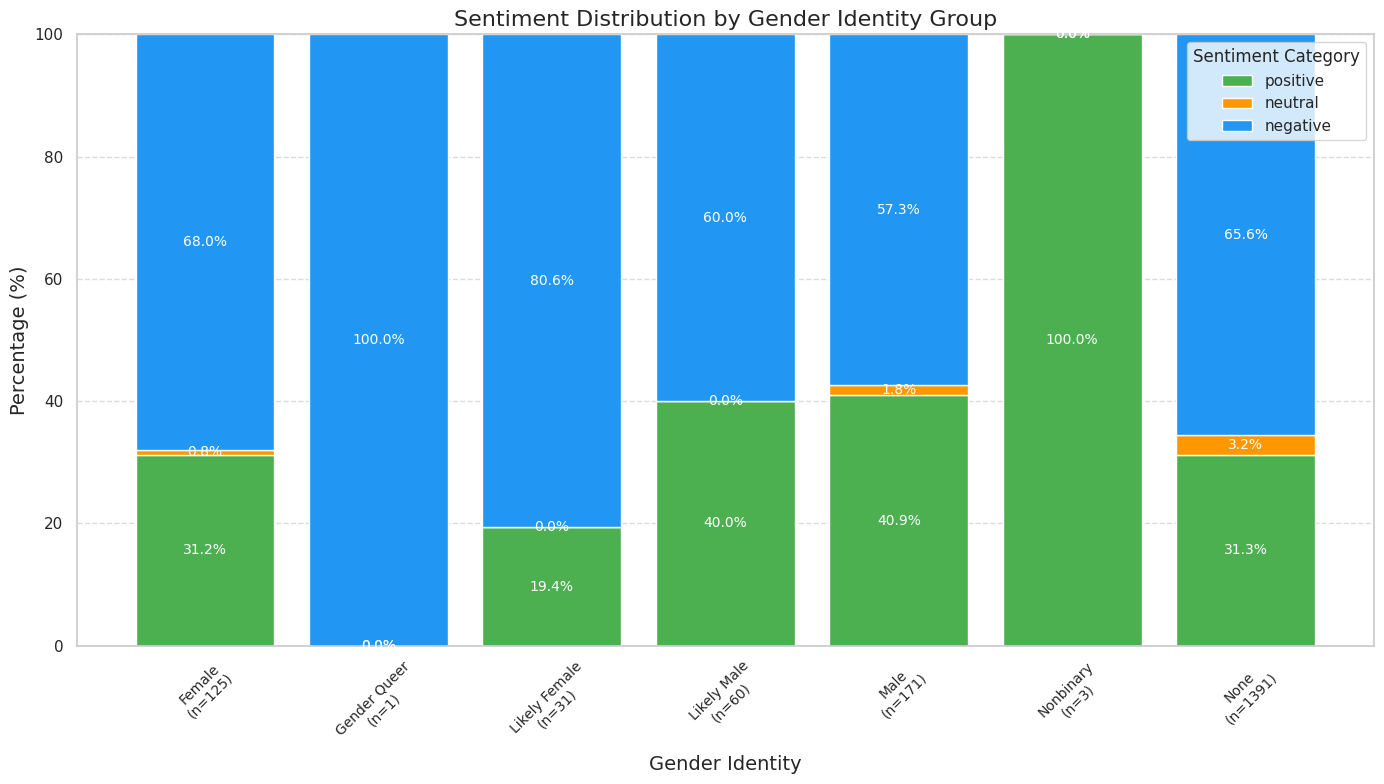

Gender identity sentiment distribution chart saved.


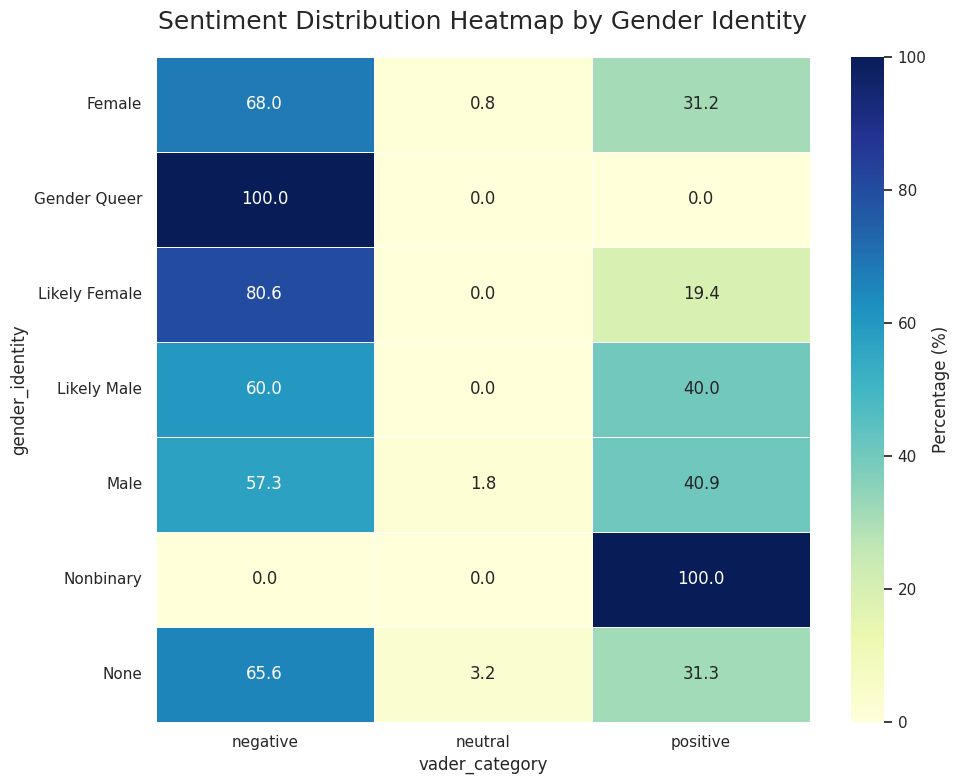

Gender identity sentiment heatmap saved.


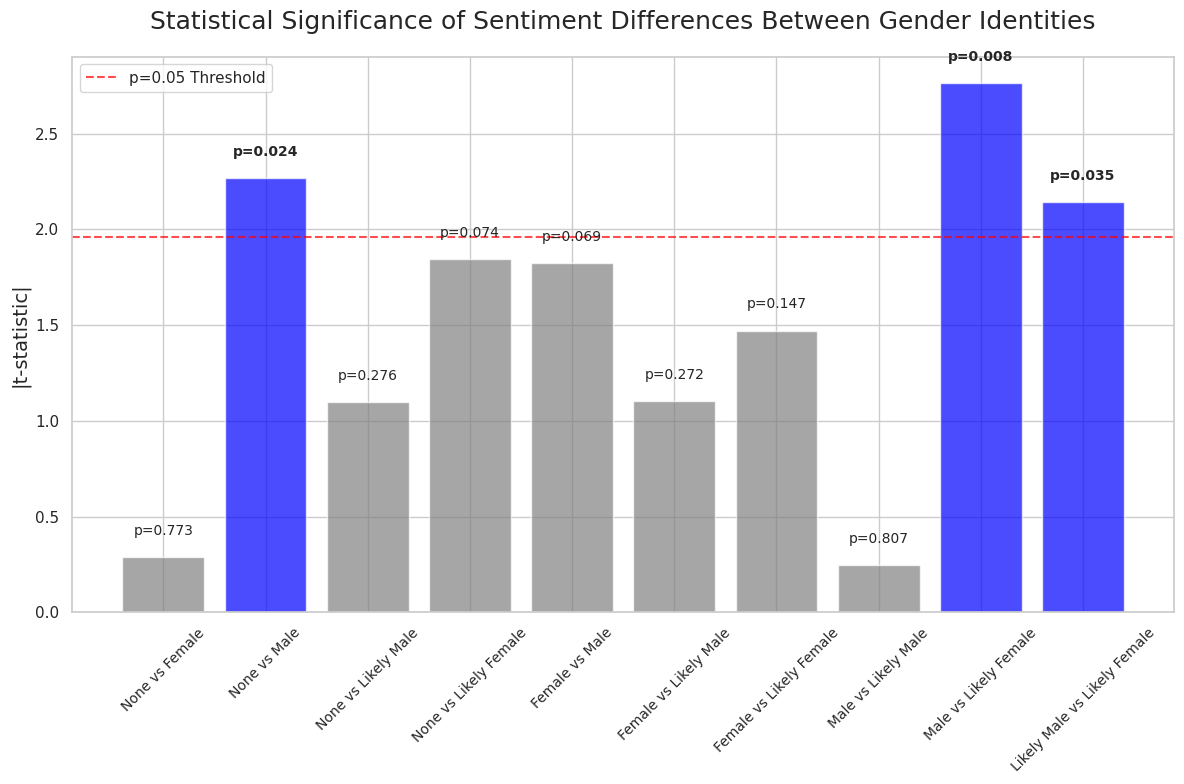

Gender identity significance testing chart saved.


In [63]:
# === 1. Sentiment Distribution by Gender Identity Group - Stacked Bar Chart ===
if 'gender_identity' in results_df.columns:
    gender_viz_df = results_df[results_df['gender_identity'].notna() &
                               (results_df['gender_identity'] != '')].copy()

    exploded_df = gender_viz_df.assign(gender_identity=gender_viz_df['gender_identity'].str.split(',')).explode('gender_identity')
    exploded_df['gender_identity'] = exploded_df['gender_identity'].str.strip()

    gender_cross_new = pd.crosstab(
        exploded_df['gender_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['gender_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(gender_cross_new))
    x = np.arange(len(gender_cross_new.index))

    for sentiment in ['positive', 'neutral', 'negative']:
        values = gender_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Gender Identity Group', fontsize=16)
    plt.xlabel('Gender Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})"
                                for identity in gender_cross_new.index], rotation=45, fontsize=10)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('VADER_gender_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Gender identity sentiment distribution chart saved.")

    # === 2. Heatmap of Sentiment Distribution by Gender Identity Group ===
    gender_cross_new.index = gender_cross_new.index.str.title()
    plt.figure(figsize=(10, 8))
    sns.heatmap(gender_cross_new, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
    plt.title('Sentiment Distribution Heatmap by Gender Identity', fontsize=18, pad=20)
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_gender_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Gender identity sentiment heatmap saved.")

# === 3. Statistical Significance Testing Between Gender Groups ===
if 'gender_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    gender_categories = [g for g in results_df['gender_identity'].unique()
                       if pd.notna(g) and g != ''][:5]

    if len(gender_categories) >= 2:
        gender_sig = []
        for i in range(len(gender_categories)):
            for j in range(i+1, len(gender_categories)):
                g1, g2 = gender_categories[i], gender_categories[j]
                scores1 = results_df[results_df['gender_identity'] == g1]['sentiment_score']
                scores2 = results_df[results_df['gender_identity'] == g2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    gender_sig.append({
                        'Group 1': g1,
                        'Group 2': g2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if gender_sig:
            sig_df = pd.DataFrame(gender_sig)
            sig_df.to_csv(figures_dir + 'VADER_gender_significance_tests.csv', index=False)

            plt.figure(figsize=(12, 8))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic']) + 0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()} vs {row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=45, fontsize=10)
            plt.title('Statistical Significance of Sentiment Differences Between Gender Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_gender_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Gender identity significance testing chart saved.")


### Racial

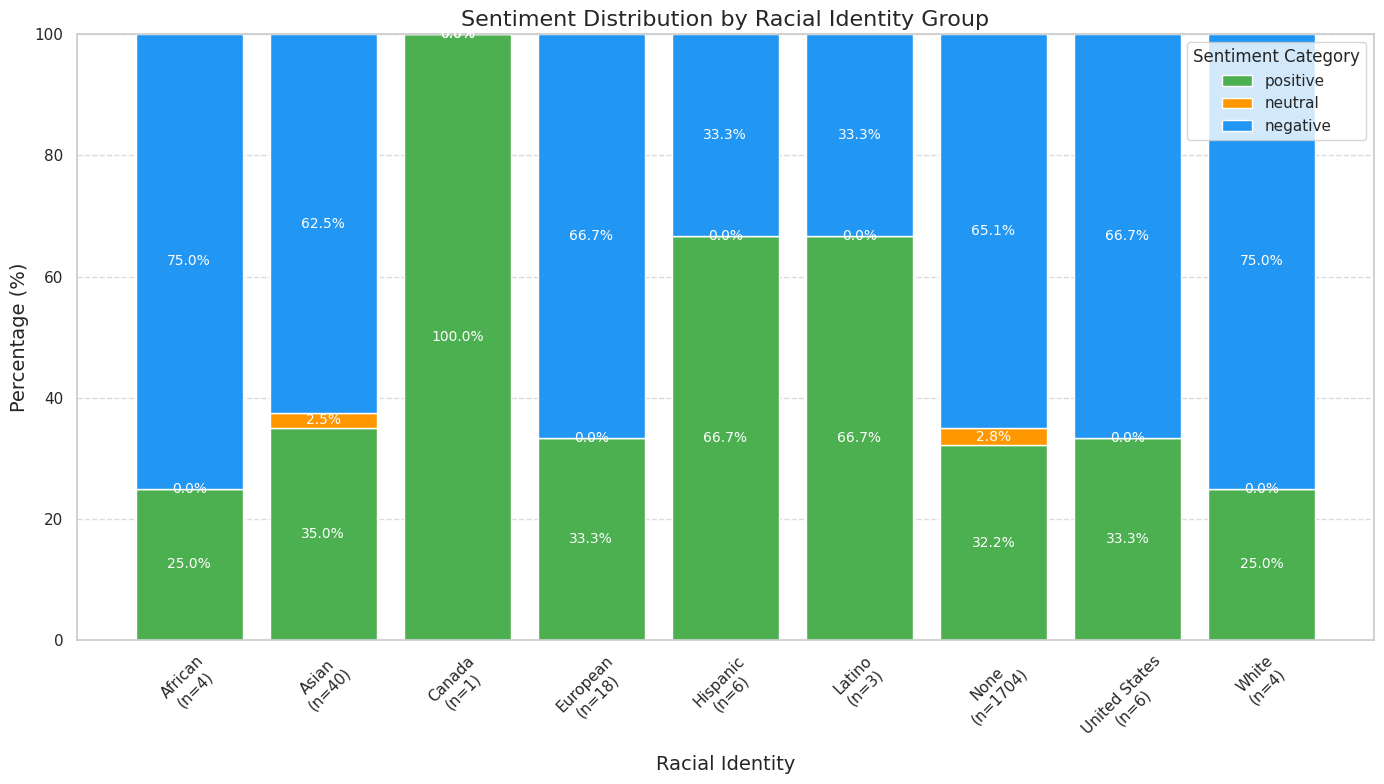

Racial identity sentiment distribution chart saved.


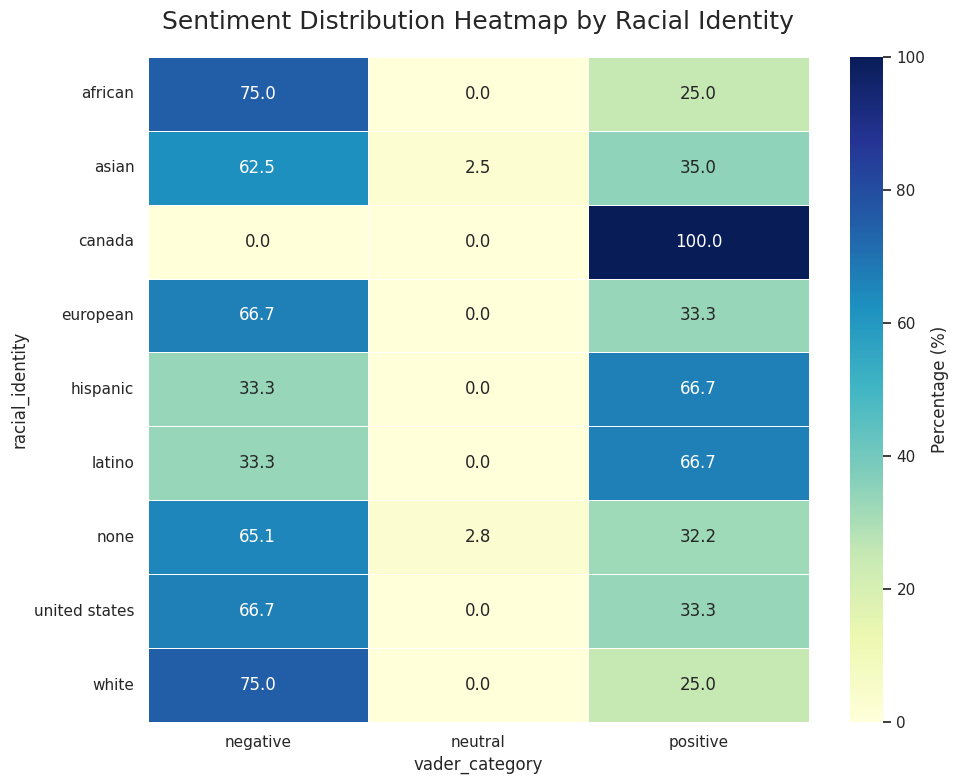

Racial identity sentiment heatmap saved.


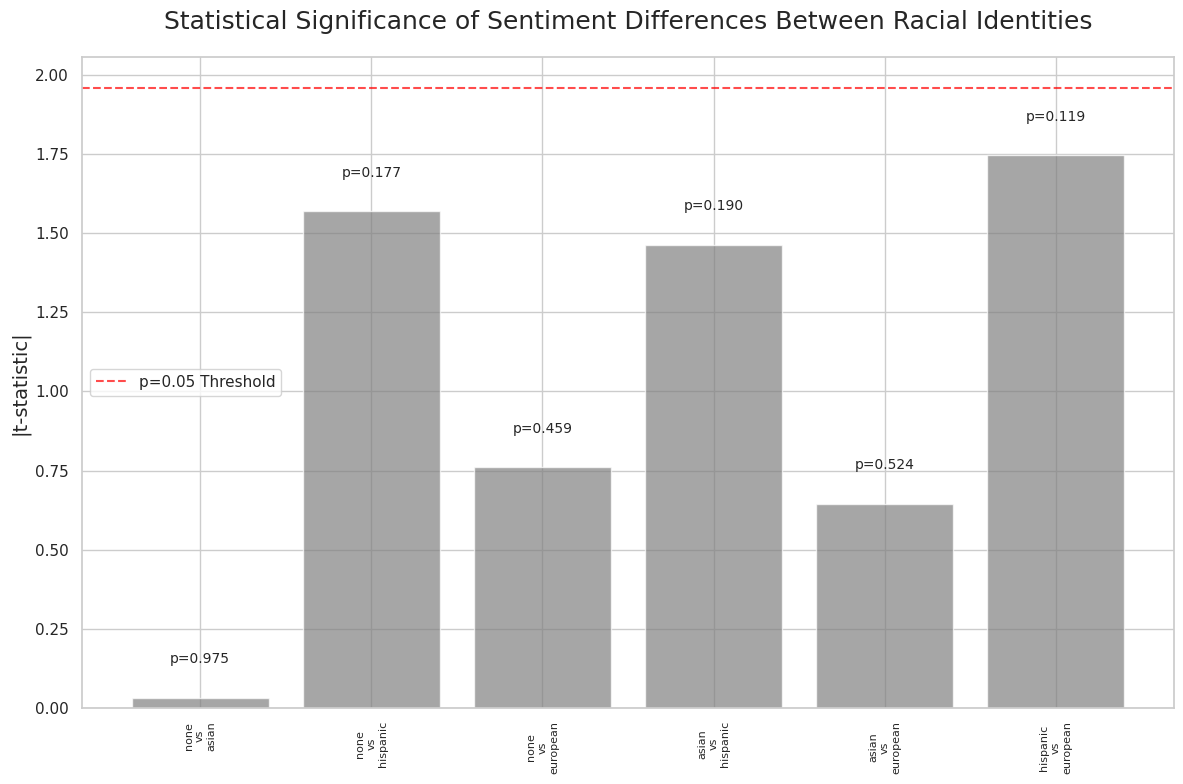

Racial identity significance testing chart saved.


In [64]:
# === 1. Sentiment Distribution by Racial Identity Group - Stacked Bar Chart ===
if 'racial_identity' in results_df.columns:
    racial_viz_df = results_df[results_df['racial_identity'].notna() &
                               (results_df['racial_identity'] != '')].copy()

    exploded_df = racial_viz_df.assign(racial_identity=racial_viz_df['racial_identity'].str.split(',')).explode('racial_identity')
    exploded_df['racial_identity'] = exploded_df['racial_identity'].str.strip()

    racial_cross_new = pd.crosstab(
        exploded_df['racial_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['racial_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(racial_cross_new))
    x = np.arange(len(racial_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'neutral', 'negative']:
        values = racial_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Racial Identity Group', fontsize=16)
    plt.xlabel('Racial Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in racial_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('VADER_racial_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment distribution chart saved.")

    # === 2. Heatmap of Sentiment Distribution by Racial Identity Group ===
    plt.figure(figsize=(10, 8))
    sns.heatmap(racial_cross_new, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
    plt.title('Sentiment Distribution Heatmap by Racial Identity', fontsize=18, pad=20)
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_racial_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment heatmap saved.")

# === 3. Statistical Significance Testing Between Racial Groups ===
if 'racial_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    racial_categories = [r for r in results_df['racial_identity'].unique()
                       if pd.notna(r) and r != ''][:5]  # You can adjust the number of categories if needed

    if len(racial_categories) >= 2:
        racial_sig = []
        for i in range(len(racial_categories)):
            for j in range(i+1, len(racial_categories)):
                r1, r2 = racial_categories[i], racial_categories[j]
                scores1 = results_df[results_df['racial_identity'] == r1]['sentiment_score']
                scores2 = results_df[results_df['racial_identity'] == r2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    racial_sig.append({
                        'Group 1': r1,
                        'Group 2': r2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if racial_sig:
            sig_df = pd.DataFrame(racial_sig)
            sig_df.to_csv(figures_dir + 'VADER_racial_significance_tests.csv', index=False)

            # Bar chart of t-statistics
            plt.figure(figsize=(12, 8))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1']}\nvs\n{row['Group 2']}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Racial Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_racial_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Racial identity significance testing chart saved.")


### Queer


Diagnostic analysis of queer identity data

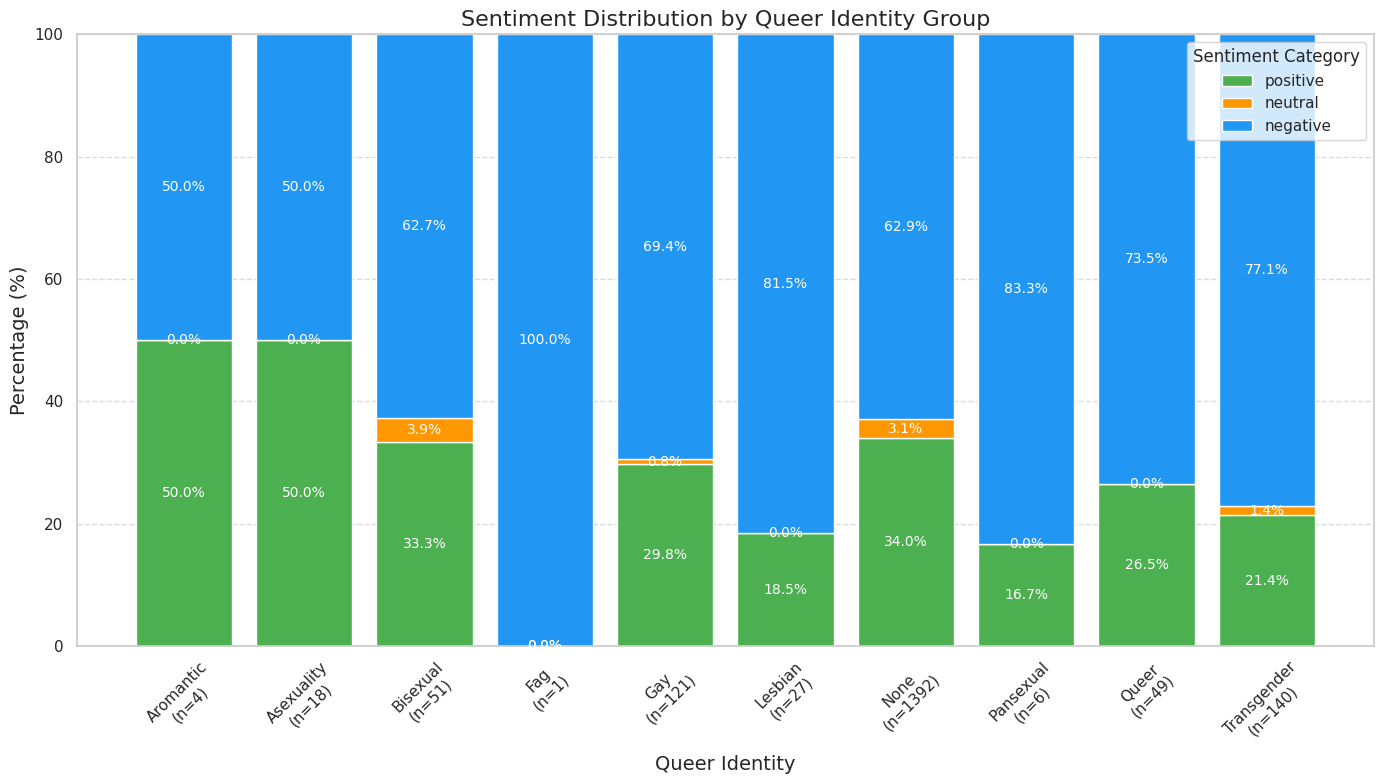

Queer identity sentiment distribution chart saved.


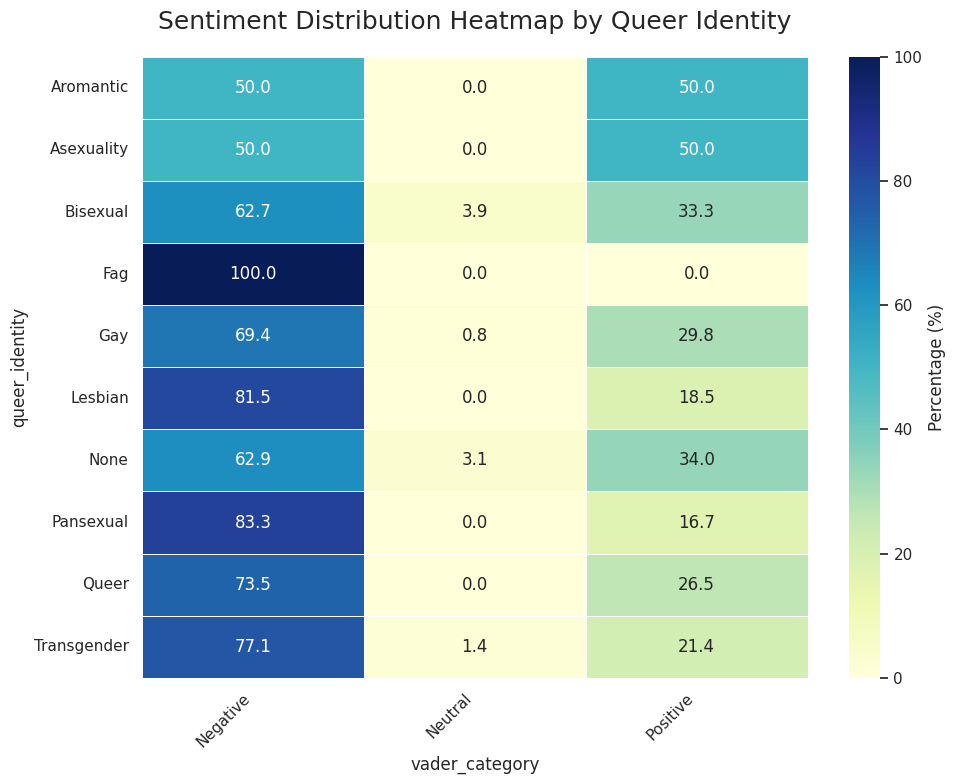

Queer identity sentiment heatmap saved.


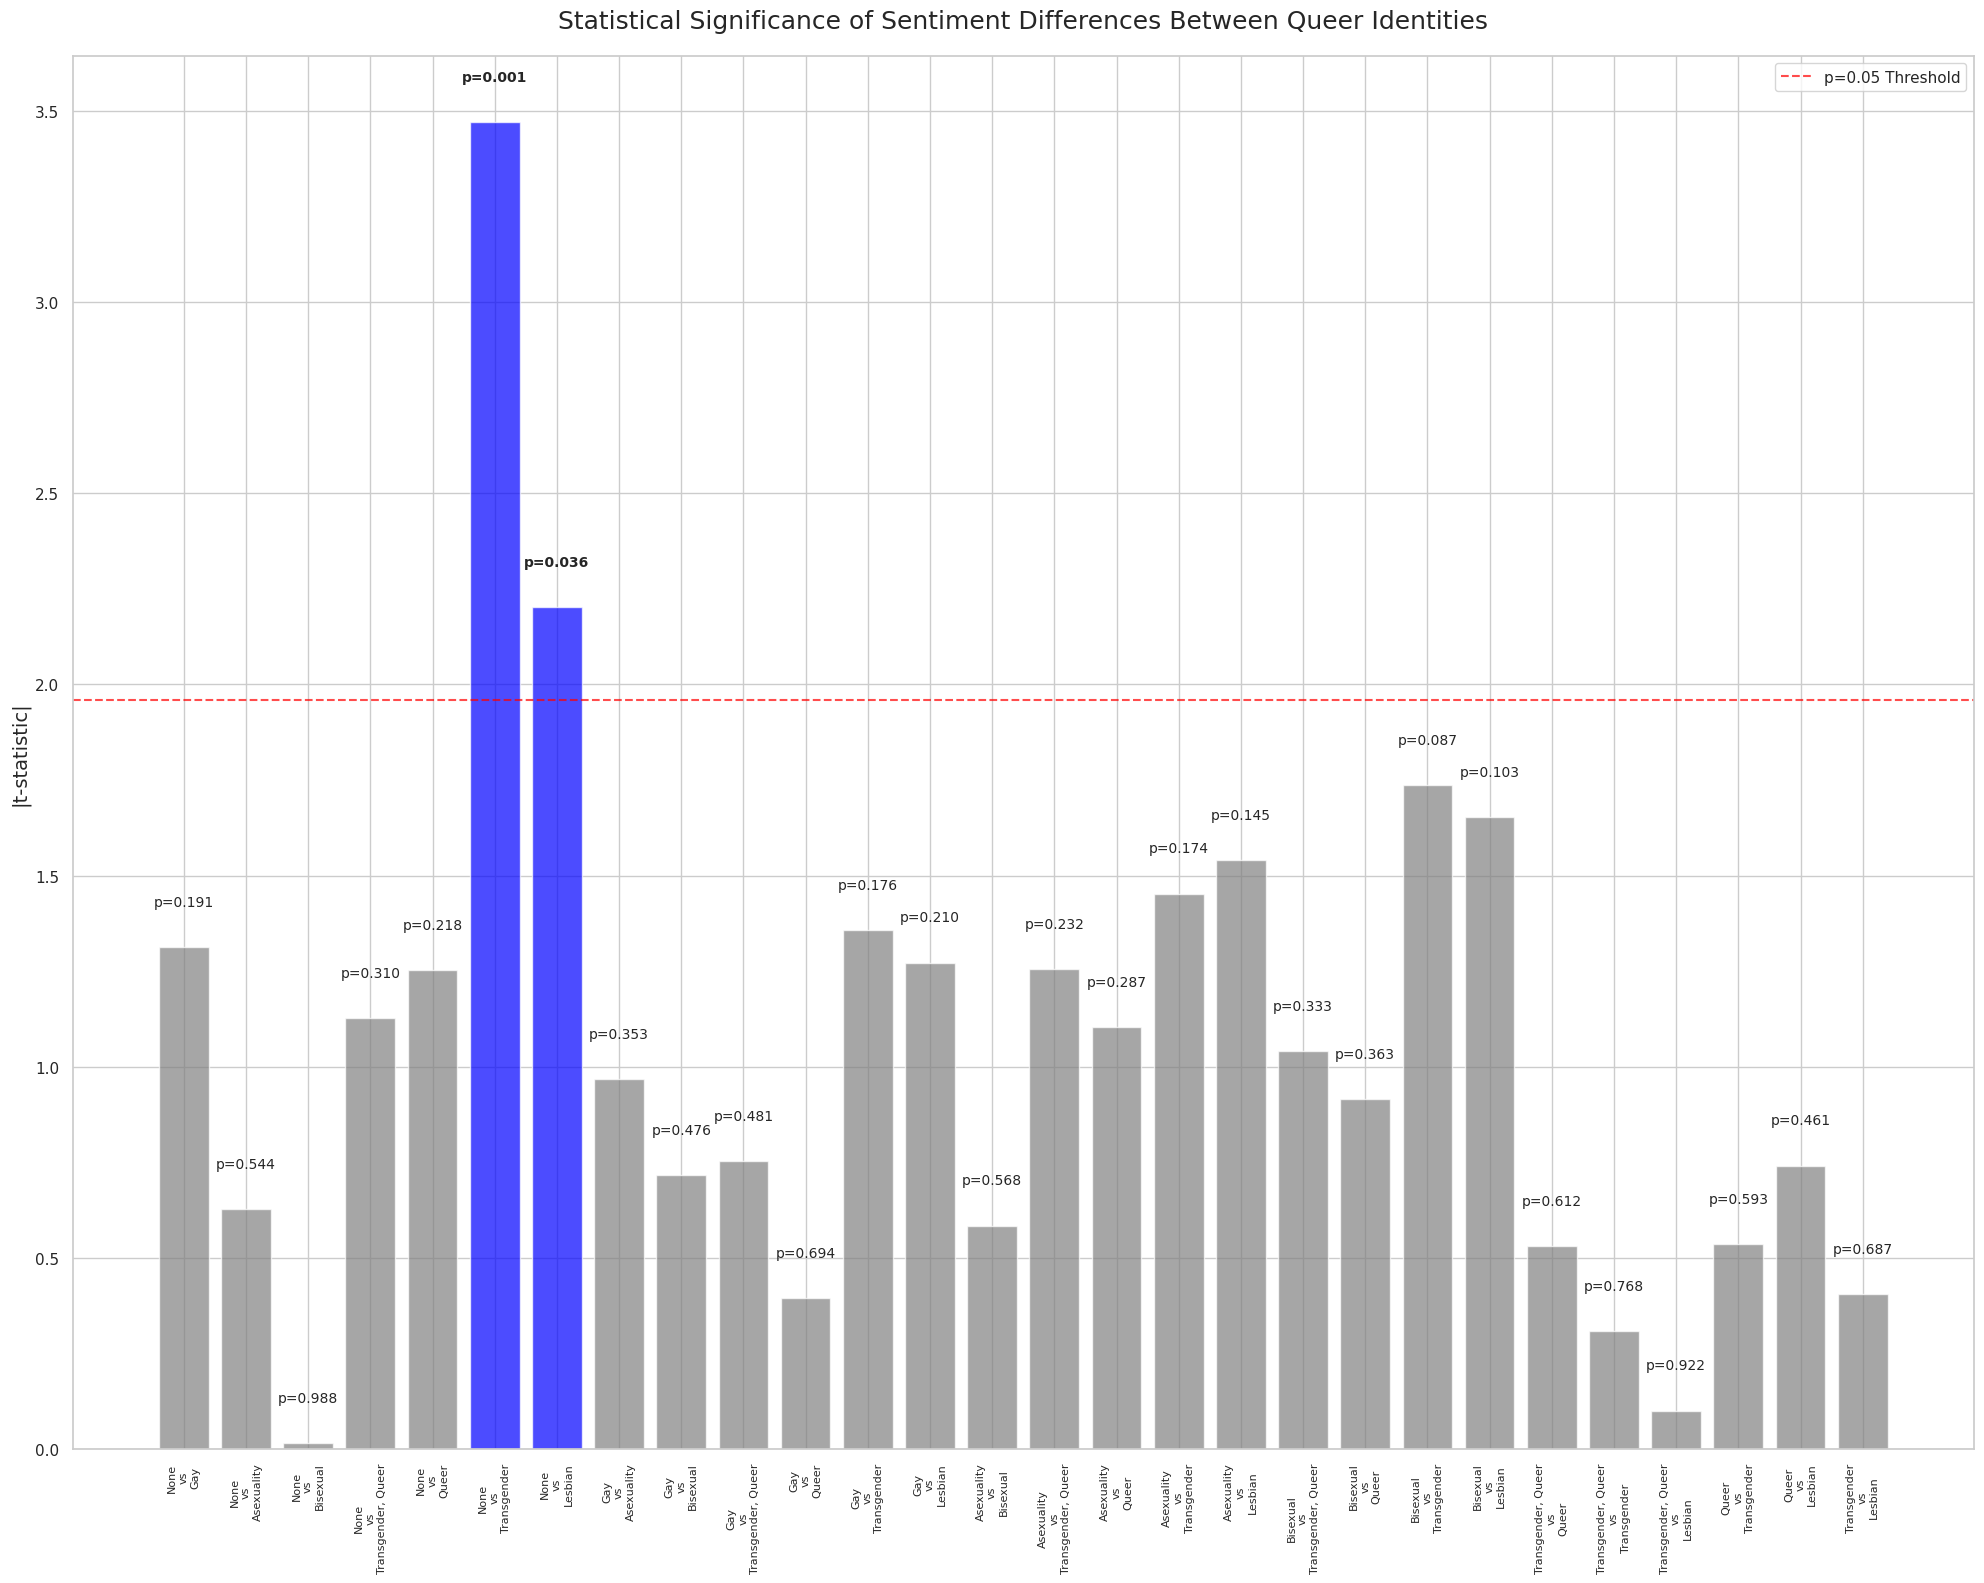

Queer identity significance testing chart saved.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Step 1: Sentiment Distribution by Queer Identity Group - Stacked Bar Chart
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['queer_identity'].value_counts()

    # Create Stacked Bar Chart
    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(queer_cross_new))
    x = np.arange(len(queer_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'neutral', 'negative']:
        values = queer_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Queer Identity Group', fontsize=16)
    plt.xlabel('Queer Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in queer_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig(figures_dir +'VADER_queer_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment distribution chart saved.")


# Step 2: Sentiment Distribution Heatmap by Queer Identity
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(queer_cross_new, annot=True, fmt='.1f', cmap='YlGnBu',
                     linewidths=.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title('Sentiment Distribution Heatmap by Queer Identity', fontsize=18, pad=20)

    # Capitalize the first letter of each word in the label for both x and y ticks
    ax.set_xticklabels([x.title() for x in queer_cross_new.columns], rotation=45, ha="right")
    ax.set_yticklabels([y.title() for y in queer_cross_new.index], rotation=0)

    # Ensure the ticks align properly
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_queer_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment heatmap saved.")



# Step 3: Statistical Significance Testing Between Queer Identity Groups
if 'queer_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    queer_categories = [q for q in results_df['queer_identity'].unique()
                       if pd.notna(q) and q != '']

    if len(queer_categories) >= 2:
        queer_sig = []
        for i in range(len(queer_categories)):
            for j in range(i+1, len(queer_categories)):
                q1, q2 = queer_categories[i], queer_categories[j]
                scores1 = results_df[results_df['queer_identity'] == q1]['sentiment_score']
                scores2 = results_df[results_df['queer_identity'] == q2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    queer_sig.append({
                        'Group 1': q1,
                        'Group 2': q2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if queer_sig:
            sig_df = pd.DataFrame(queer_sig)
            sig_df.to_csv(figures_dir + 'VADER_queer_significance_tests.csv', index=False)

            # Plot the t-statistics
            plt.figure(figsize=(20, 16))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')

            # Capitalize the first letter of each word in the label for both groups
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()}\nvs\n{row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Queer Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_queer_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Queer identity significance testing chart saved.")


subset

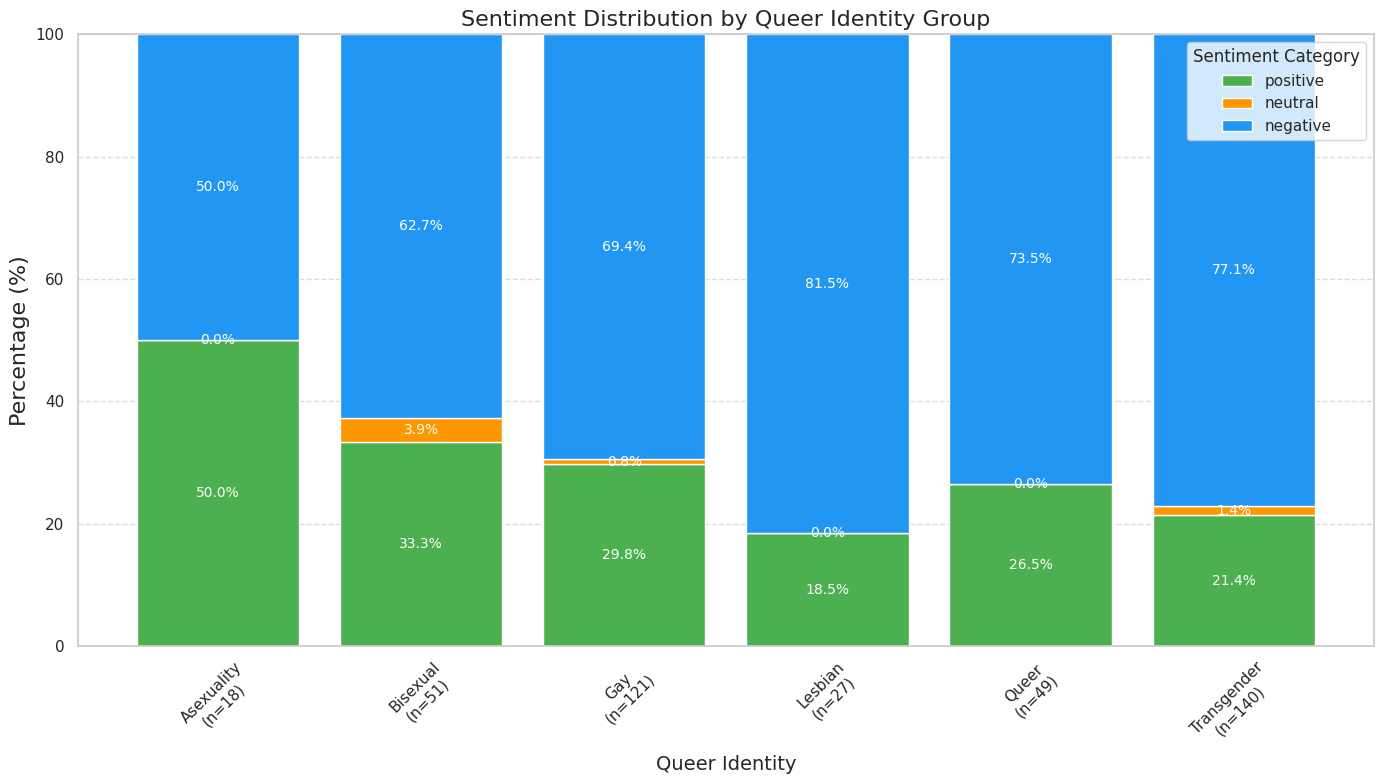

Queer identity sentiment distribution chart saved.


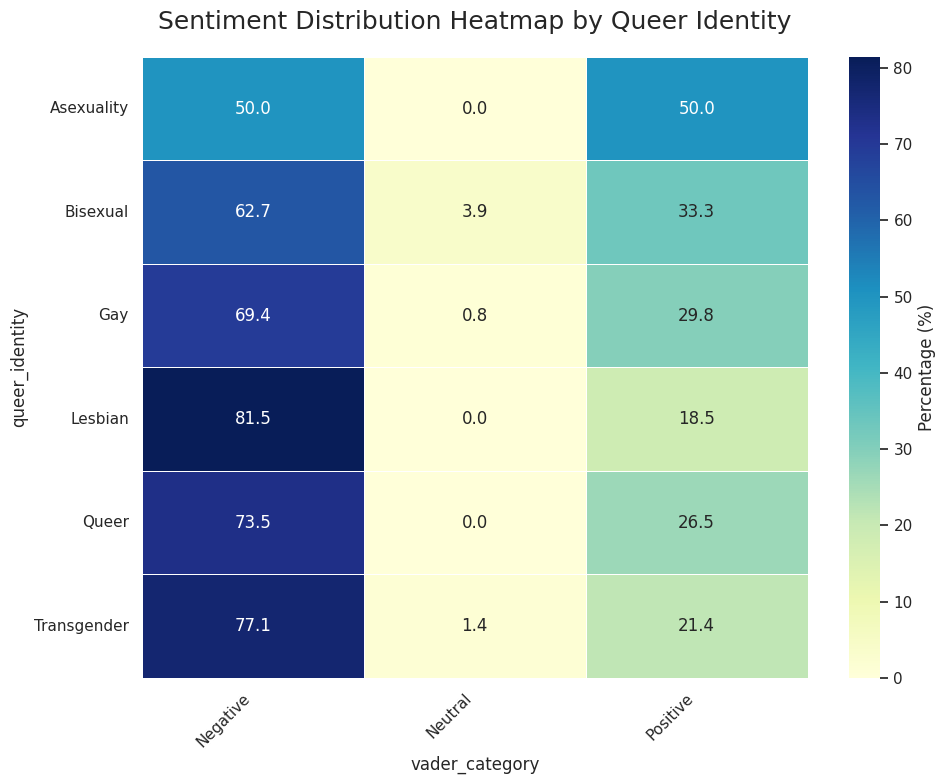

Queer identity sentiment heatmap saved.


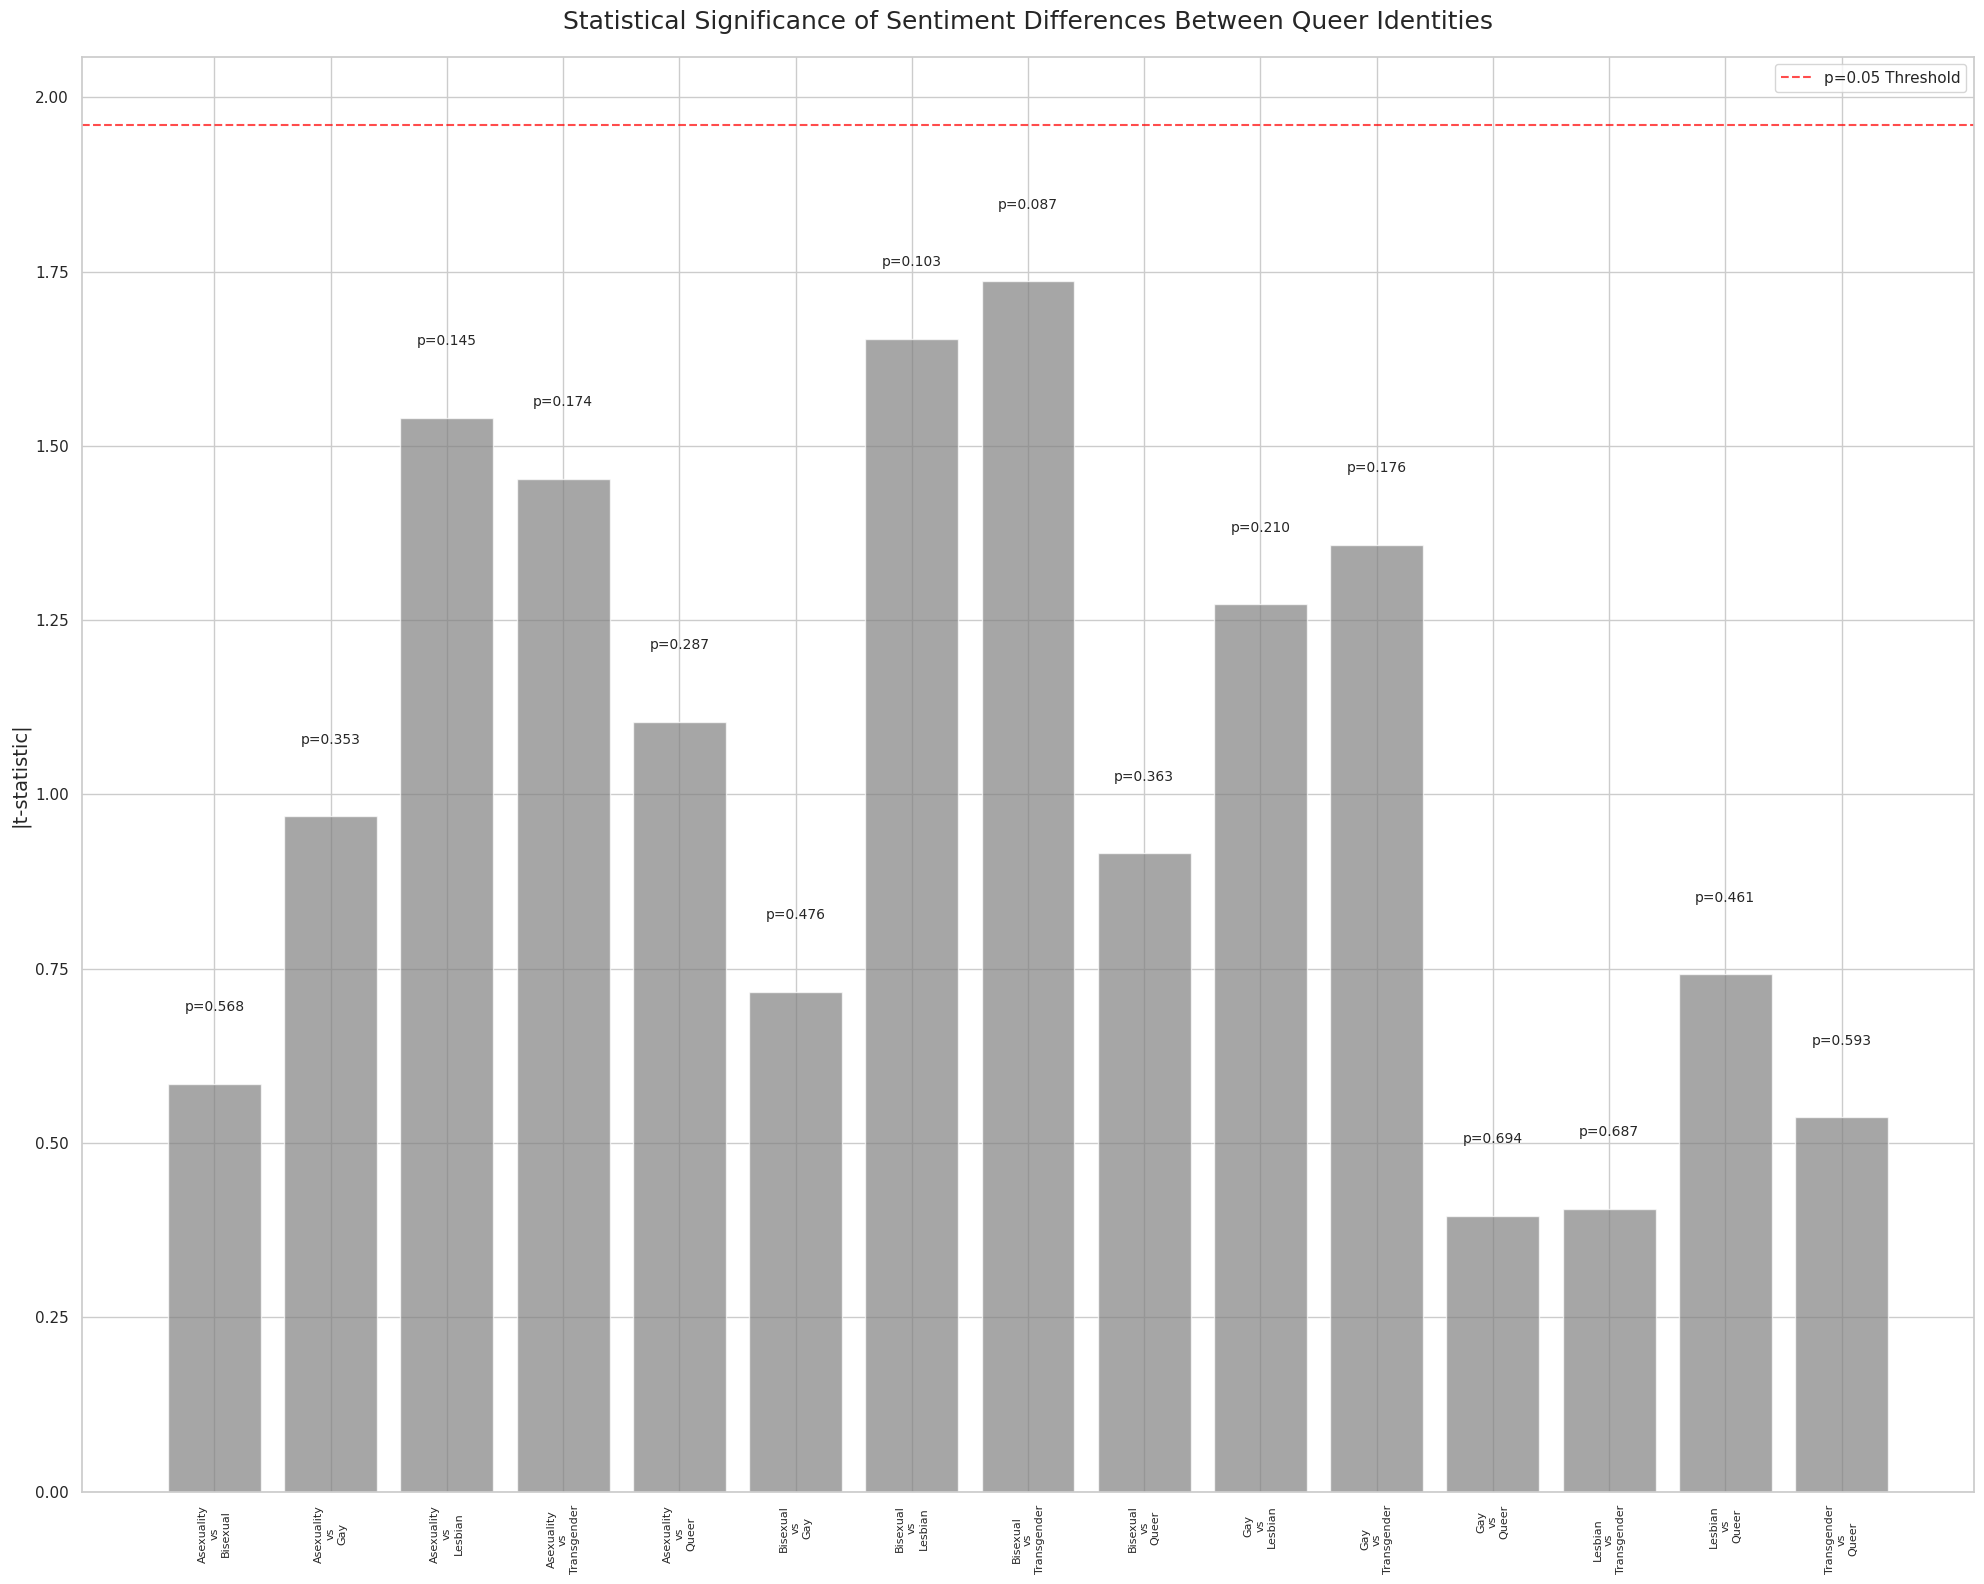

Queer identity significance testing chart saved.


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Step 1: Sentiment Distribution by Queer Identity Group - Stacked Bar Chart
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    selected_identities = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']
    exploded_df = exploded_df[exploded_df['queer_identity'].isin(selected_identities)]

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['queer_identity'].value_counts()

    # Create Stacked Bar Chart
    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(queer_cross_new))
    x = np.arange(len(queer_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'neutral', 'negative']:
        values = queer_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Queer Identity Group', fontsize=16)
    plt.xlabel('Queer Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=16)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in queer_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig(figures_dir +'VADER_SUB_queer_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment distribution chart saved.")


# Step 2: Sentiment Distribution Heatmap by Queer Identity
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    selected_identities = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']
    exploded_df = exploded_df[exploded_df['queer_identity'].isin(selected_identities)]

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(queer_cross_new, annot=True, fmt='.1f', cmap='YlGnBu',
                     linewidths=.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title('Sentiment Distribution Heatmap by Queer Identity', fontsize=18, pad=20)

    # Capitalize the first letter of each word in the label for both x and y ticks
    ax.set_xticklabels([x.title() for x in queer_cross_new.columns], rotation=45, ha="right")
    ax.set_yticklabels([y.title() for y in queer_cross_new.index], rotation=0)

    # Ensure the ticks align properly
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_SUB_queer_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment heatmap saved.")



# Step 3: Statistical Significance Testing Between Queer Identity Groups
if 'queer_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    queer_categories = ['asexuality', 'bisexual', 'gay', 'lesbian', 'transgender', 'queer']

    if len(queer_categories) >= 2:
        queer_sig = []
        for i in range(len(queer_categories)):
            for j in range(i+1, len(queer_categories)):
                q1, q2 = queer_categories[i], queer_categories[j]
                scores1 = results_df[results_df['queer_identity'] == q1]['sentiment_score']
                scores2 = results_df[results_df['queer_identity'] == q2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    queer_sig.append({
                        'Group 1': q1,
                        'Group 2': q2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if queer_sig:
            sig_df = pd.DataFrame(queer_sig)
            sig_df.to_csv(figures_dir + 'VADER_SUB_queer_significance_tests.csv', index=False)

            # Plot the t-statistics
            plt.figure(figsize=(20, 16))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')

            # Capitalize the first letter of each word in the label for both groups
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()}\nvs\n{row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Queer Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_SUB_queer_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Queer identity significance testing chart saved.")


# Other graph?

In [66]:
results_df['gender_identity'].unique()

array(['none', 'female', 'male', 'likely male', 'likely female',
       'nonbinary', 'gender queer'], dtype=object)

In [67]:
def process_identity_column(df, column_name):
    # Step 1: Split the identities by commas and strip spaces
    df['split_identity'] = df[column_name].apply(lambda x: [i.strip() for i in x.split(',')])

    # Step 2: Extract unique identities while preserving the order
    unique_identities = pd.Series([identity for sublist in df['split_identity'] for identity in sublist]).unique()
    #print(unique_identities)  # To check the order

    # Step 3: Create binary columns for each unique identity
    for identity in unique_identities:
        df[identity] = df['split_identity'].apply(lambda x: 1 if identity in x else 0)

    # Drop the intermediate 'split_identity' column
    df = df.drop(columns=['split_identity'])

    return df

# Copy the dataframe for processing
results_df_all = results_df.copy()

# Apply to 'gender_identity' column manually
unique_genders = results_df_all['gender_identity'].unique()
for gender in unique_genders:
    results_df_all[gender] = results_df_all['gender_identity'].apply(lambda x: 1 if x == gender else 0)

# Apply the identity processing function to 'racial_identity' and 'queer_identity'
#results_df_all = process_identity_column(results_df_all, 'racial_identity')
#results_df_all = process_identity_column(results_df_all, 'queer_identity')

# Check current column names
print(results_df_all.columns)


#result_df_all.rename[10]='no_gender_identity'

#print(results_df_all.columns)
#results_df_all.rename(: 'no_gender_identity',
# Verify the changes
print(results_df_all.head())


Index(['text_id', 'vader_compound', 'vader_category', 'gender_identity',
       'racial_identity', 'queer_identity', 'sentiment_score', 'none',
       'female', 'male', 'likely male', 'likely female', 'nonbinary',
       'gender queer'],
      dtype='object')
   text_id  vader_compound vader_category gender_identity racial_identity  \
0        0          0.6829       positive            none            none   
1        1         -0.9968       negative            none            none   
2        2          0.0131        neutral            none            none   
3        3          0.9892       positive            none            none   
4        4          0.1779       positive            none            none   

  queer_identity  sentiment_score  none  female  male  likely male  \
0           none                1     1       0     0            0   
1           none               -1     1       0     0            0   
2           none                0     1       0     0            0 

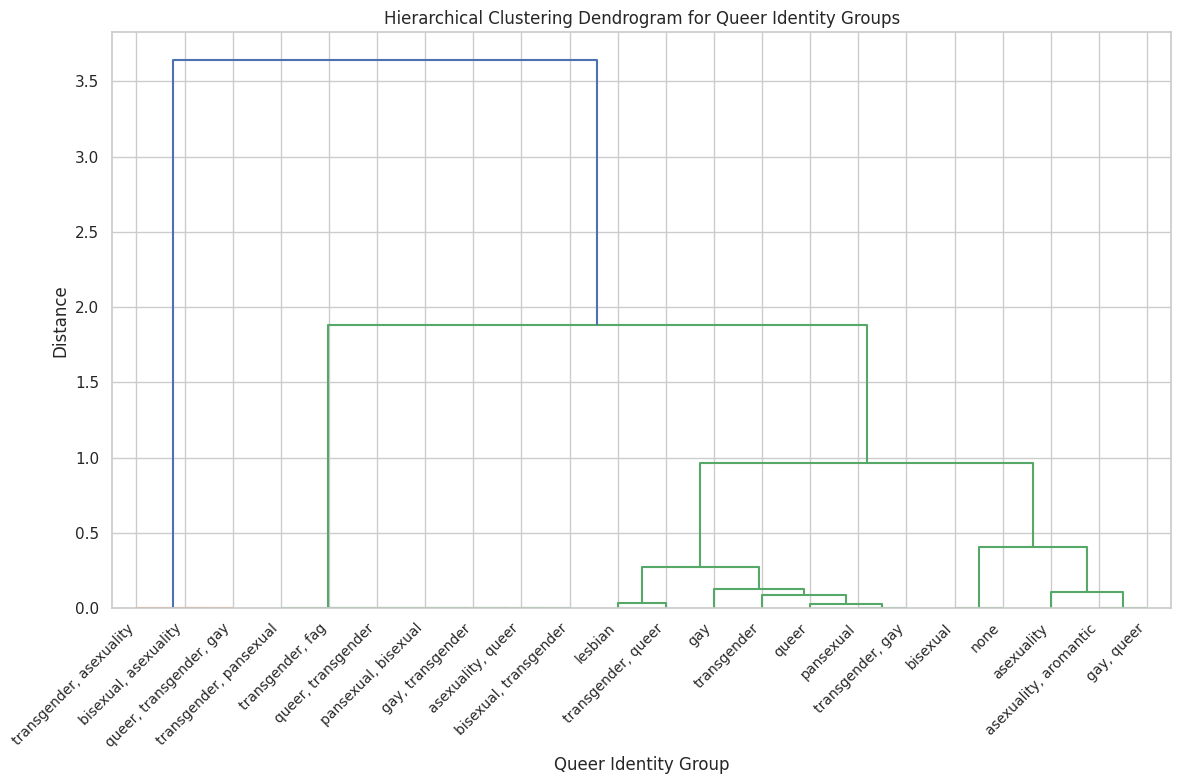

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `results_df` has columns 'queer_identity' and 'sentiment_score'
# Let's first process the data for clustering.

# Create a DataFrame with average sentiment scores for each queer identity group
queer_group_sentiment = results_df.groupby('queer_identity')['sentiment_score'].mean().reset_index()

# Convert the sentiment score to a numpy array, which is required for clustering
data_for_clustering = queer_group_sentiment['sentiment_score'].values.reshape(-1, 1)

# Perform hierarchical clustering using 'ward' method
linked = linkage(data_for_clustering, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=queer_group_sentiment['queer_identity'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram for Queer Identity Groups')
plt.xlabel('Queer Identity Group')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()


# Visualization: Subset

In [72]:
combined_df = combined_df[combined_df['label_mental_health'] == 1]
combined_df.shape

(1433, 28)

In [73]:
# 4. Visualization of Results

import matplotlib.pyplot as plt

colors = {
    'positive': '#4CAF50',  # Green
    'neutral': '#FF9800',   # Orange
    'negative': '#2196F3'   # Blue
}
# Create a directory to save the figures
import os
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Set Seaborn style for better aesthetics
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

from scipy import stats

### Unified Visualization

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


# Set visual style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create folder for saving figures
figures_dir = file_fold + 'figures/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# === Generalized plotting function ===
def plot_sentiment_distribution(df, identity_col, title, filename, simplify_func=None, top_categories=None, rotate_labels=False):
    # Filter rows with non-empty identity
    filtered_df = df[df[identity_col].notna() & (df[identity_col] != '')].copy()

    # Apply simplification function if provided (for queer identities)
    if simplify_func:
        filtered_df['main_identity'] = filtered_df[identity_col].apply(simplify_func)
        identity_used = 'main_identity'
    else:
        identity_used = identity_col

    # Filter to top categories if specified
    if top_categories:
        filtered_df = filtered_df[filtered_df[identity_used].isin(top_categories)]

    # Get counts for label display
    identity_counts = filtered_df[identity_used].value_counts()

    # Create cross-tab of sentiment distribution
    cross_tab = pd.crosstab(
        filtered_df[identity_used],
        filtered_df['vader_category'],
        normalize='index'
    ) * 100

    # Start plotting
    plt.figure(figsize=(14, 8))
    bottom = np.zeros(len(cross_tab))
    x = np.arange(len(cross_tab.index))

    for sentiment in ['positive', 'neutral', 'negative']:
        values = cross_tab[sentiment].values if sentiment in cross_tab.columns else np.zeros(len(cross_tab))
        plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

    # Configure labels and layout
    plt.title(title, fontsize=16)
    plt.xlabel(identity_col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    label_names = [f"{identity}\n(n={identity_counts[identity]})" for identity in cross_tab.index]
    plt.xticks(ticks=x, labels=label_names, rotation=45 if rotate_labels else 0, ha='right' if rotate_labels else 'center')
    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig(figures_dir + filename, dpi=300)
    plt.close()
    print(f"{title} chart saved as {filename}")

# === 1. Gender Identity Plot ===
if 'gender_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='gender_identity',
        title='Sentiment Distribution by Gender Identity Group',
        filename='VADER_MH_gender_sentiment_distribution.png',
        rotate_labels=False
    )

# === 2. Racial Identity Plot ===
if 'racial_identity' in results_df.columns:
    plot_sentiment_distribution(
        df=results_df,
        identity_col='racial_identity',
        title='Sentiment Distribution by Racial Identity Group',
        filename='VADER_MH_race_sentiment_distribution.png',
        rotate_labels=True
    )

# === 3. Queer Identity Plot ===
if 'queer_identity' in results_df.columns:
    # Simplify queer identities to group similar or ambiguous labels
    def simplify_queer_identity(identity):
        if 'Flag for other' in identity:
            return 'Lesbian'
        if 'Gay?' in identity:
            return 'Gay'
        if 'flag not him' in identity:
            return 'Queer'
        if ',' in identity:
            return identity.split(',')[0].strip()
        return identity

    # Only display these categories in the final chart
    top_queer_categories = ['Transgender', 'Gay', 'Bisexual', 'Queer', 'Lesbian', 'Asexuality']

    plot_sentiment_distribution(
        df=results_df,
        identity_col='queer_identity',
        title='Sentiment Distribution by Queer Identity Group',
        filename='VADER_MH_queer_sentiment_distribution.png',
        simplify_func=simplify_queer_identity,
        top_categories=top_queer_categories,
        rotate_labels=False
    )


Sentiment Distribution by Gender Identity Group chart saved as VADER_MH_gender_sentiment_distribution.png
Sentiment Distribution by Racial Identity Group chart saved as VADER_MH_race_sentiment_distribution.png
Sentiment Distribution by Queer Identity Group chart saved as VADER_MH_queer_sentiment_distribution.png


### Gender

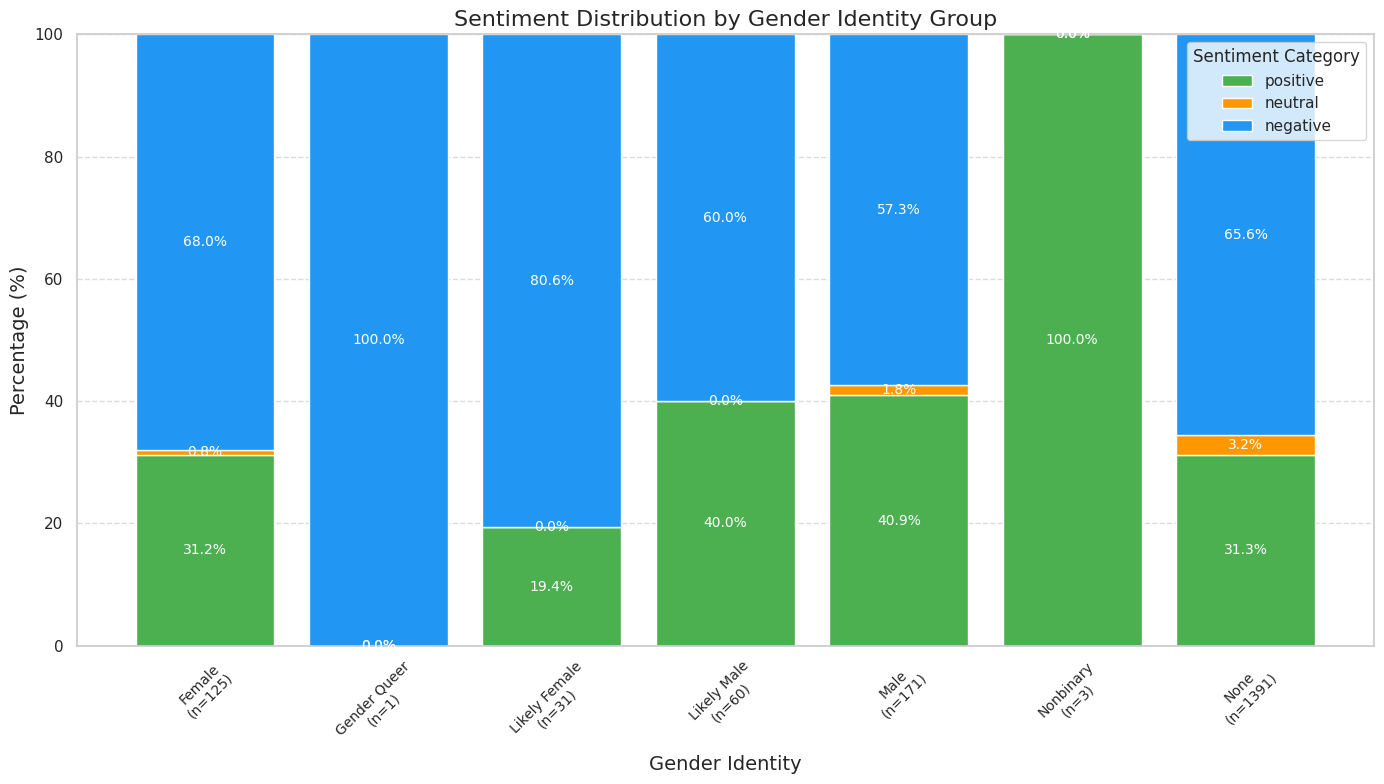

Gender identity sentiment distribution chart saved.


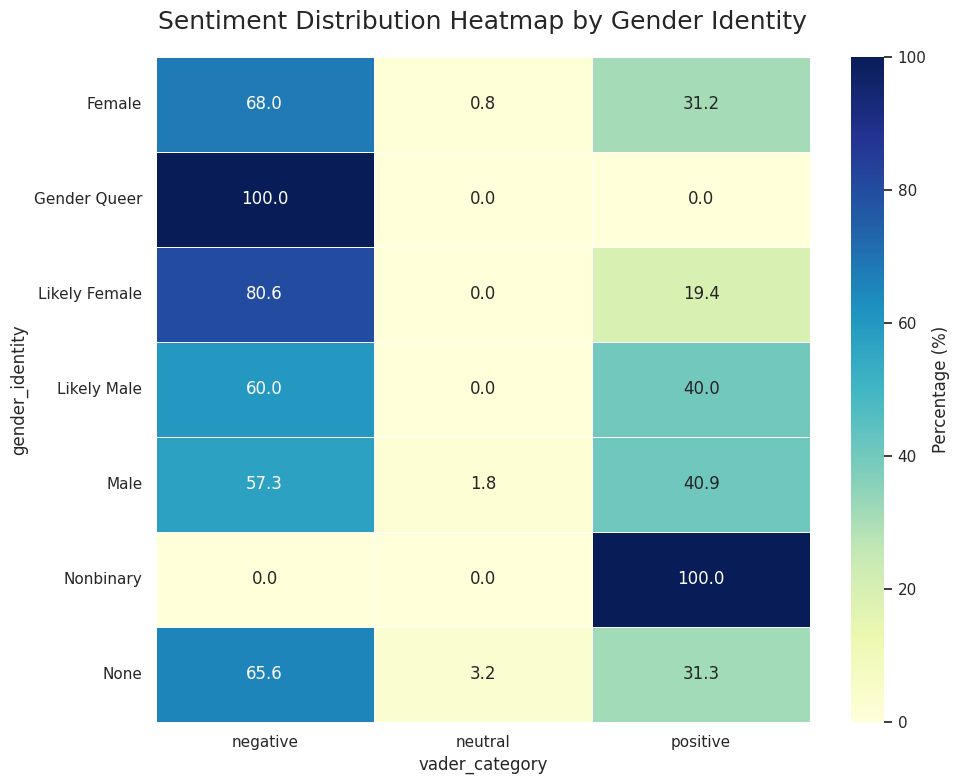

Gender identity sentiment heatmap saved.


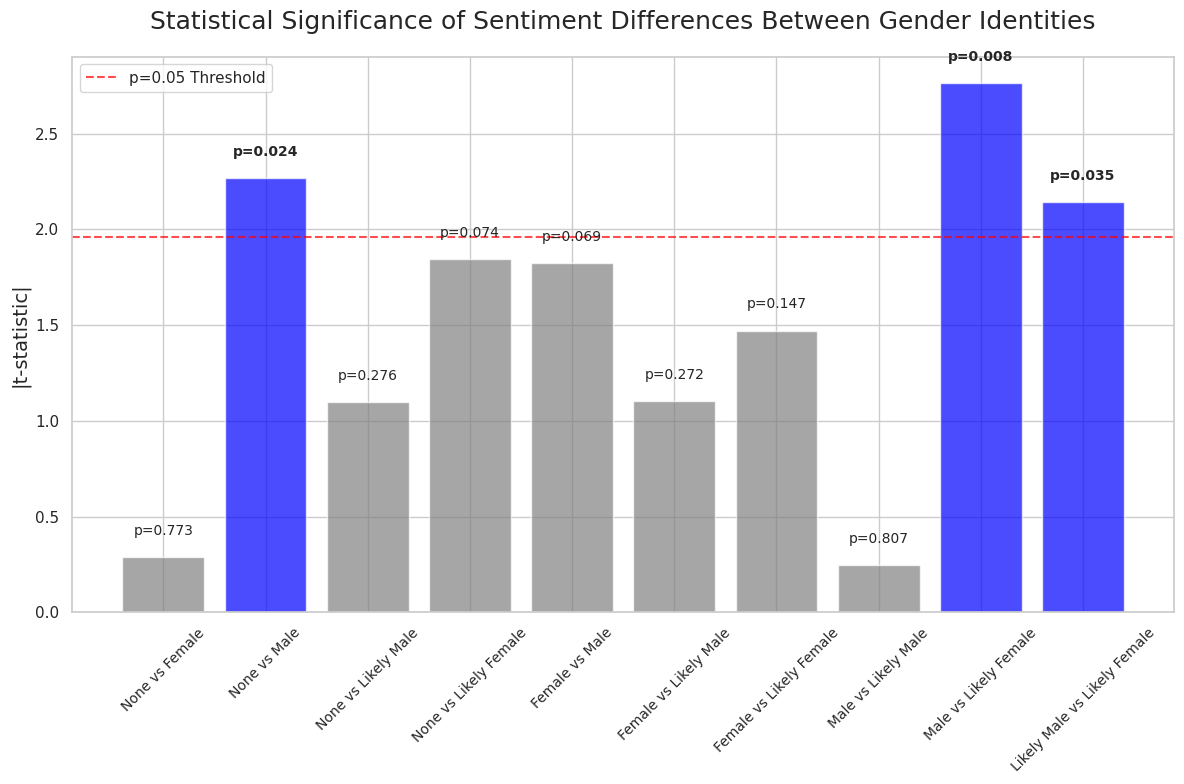

Gender identity significance testing chart saved.


In [75]:
# === 1. Sentiment Distribution by Gender Identity Group - Stacked Bar Chart ===
if 'gender_identity' in results_df.columns:
    gender_viz_df = results_df[results_df['gender_identity'].notna() &
                               (results_df['gender_identity'] != '')].copy()

    exploded_df = gender_viz_df.assign(gender_identity=gender_viz_df['gender_identity'].str.split(',')).explode('gender_identity')
    exploded_df['gender_identity'] = exploded_df['gender_identity'].str.strip()

    gender_cross_new = pd.crosstab(
        exploded_df['gender_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['gender_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(gender_cross_new))
    x = np.arange(len(gender_cross_new.index))

    for sentiment in ['positive', 'neutral', 'negative']:
        values = gender_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Gender Identity Group', fontsize=16)
    plt.xlabel('Gender Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})"
                                for identity in gender_cross_new.index], rotation=45, fontsize=10)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('VADER_MH_gender_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Gender identity sentiment distribution chart saved.")

    # === 2. Heatmap of Sentiment Distribution by Gender Identity Group ===
    gender_cross_new.index = gender_cross_new.index.str.title()
    plt.figure(figsize=(10, 8))
    sns.heatmap(gender_cross_new, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
    plt.title('Sentiment Distribution Heatmap by Gender Identity', fontsize=18, pad=20)
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_MH_gender_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Gender identity sentiment heatmap saved.")

# === 3. Statistical Significance Testing Between Gender Groups ===
if 'gender_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    gender_categories = [g for g in results_df['gender_identity'].unique()
                       if pd.notna(g) and g != ''][:5]

    if len(gender_categories) >= 2:
        gender_sig = []
        for i in range(len(gender_categories)):
            for j in range(i+1, len(gender_categories)):
                g1, g2 = gender_categories[i], gender_categories[j]
                scores1 = results_df[results_df['gender_identity'] == g1]['sentiment_score']
                scores2 = results_df[results_df['gender_identity'] == g2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    gender_sig.append({
                        'Group 1': g1,
                        'Group 2': g2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if gender_sig:
            sig_df = pd.DataFrame(gender_sig)
            sig_df.to_csv(figures_dir + 'VADER_MH_gender_significance_tests.csv', index=False)

            plt.figure(figsize=(12, 8))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic']) + 0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()} vs {row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=45, fontsize=10)
            plt.title('Statistical Significance of Sentiment Differences Between Gender Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_MH_gender_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Gender identity significance testing chart saved.")


### Racial

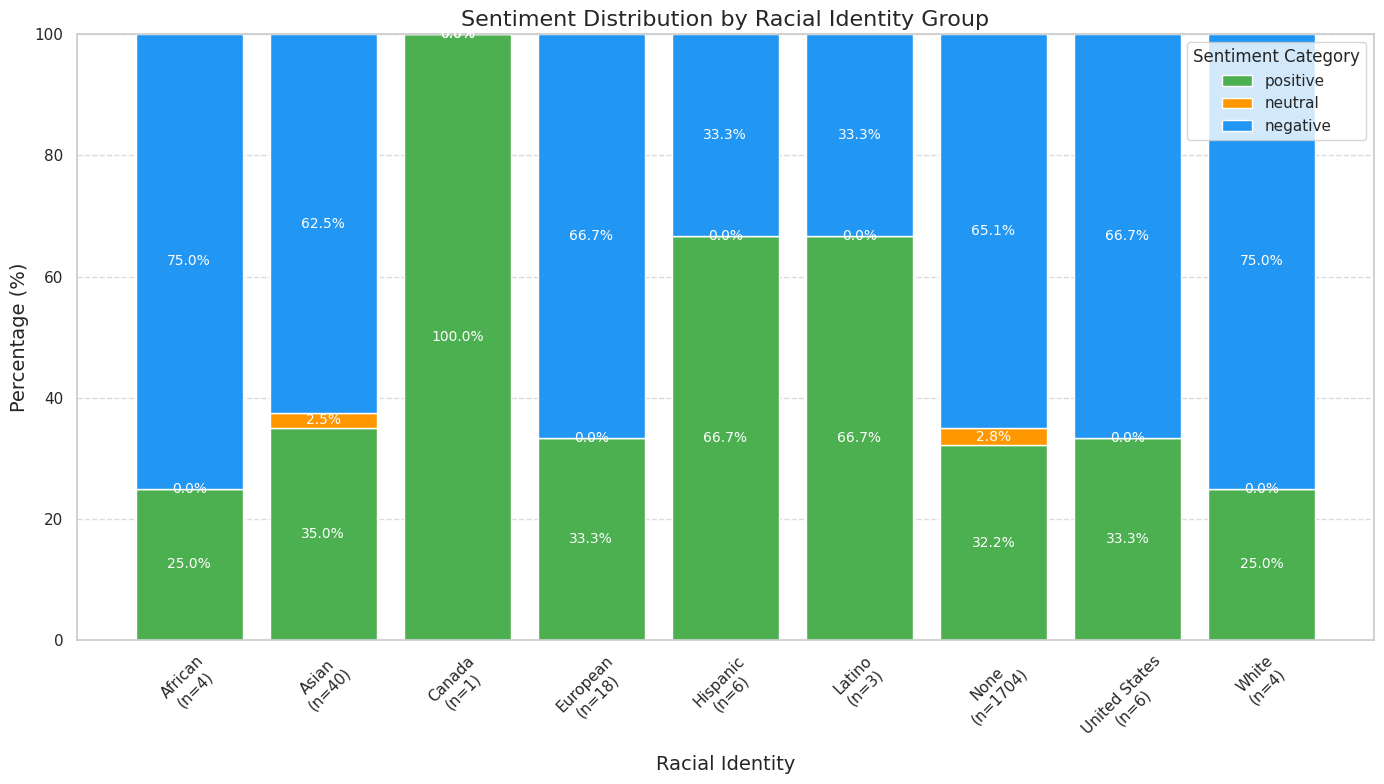

Racial identity sentiment distribution chart saved.


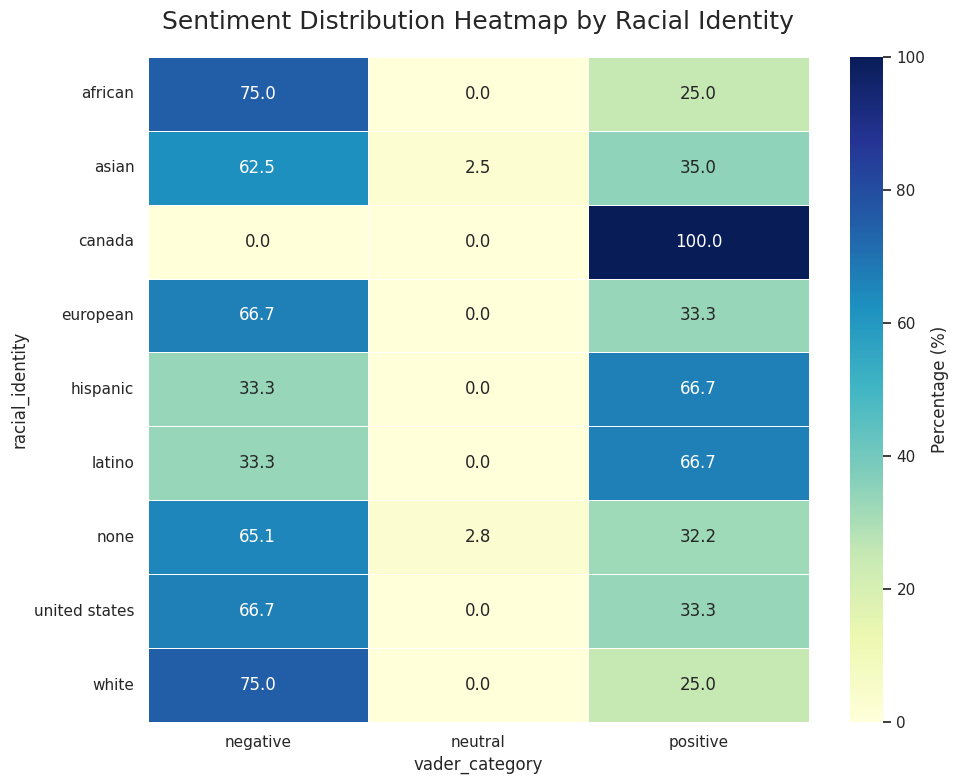

Racial identity sentiment heatmap saved.


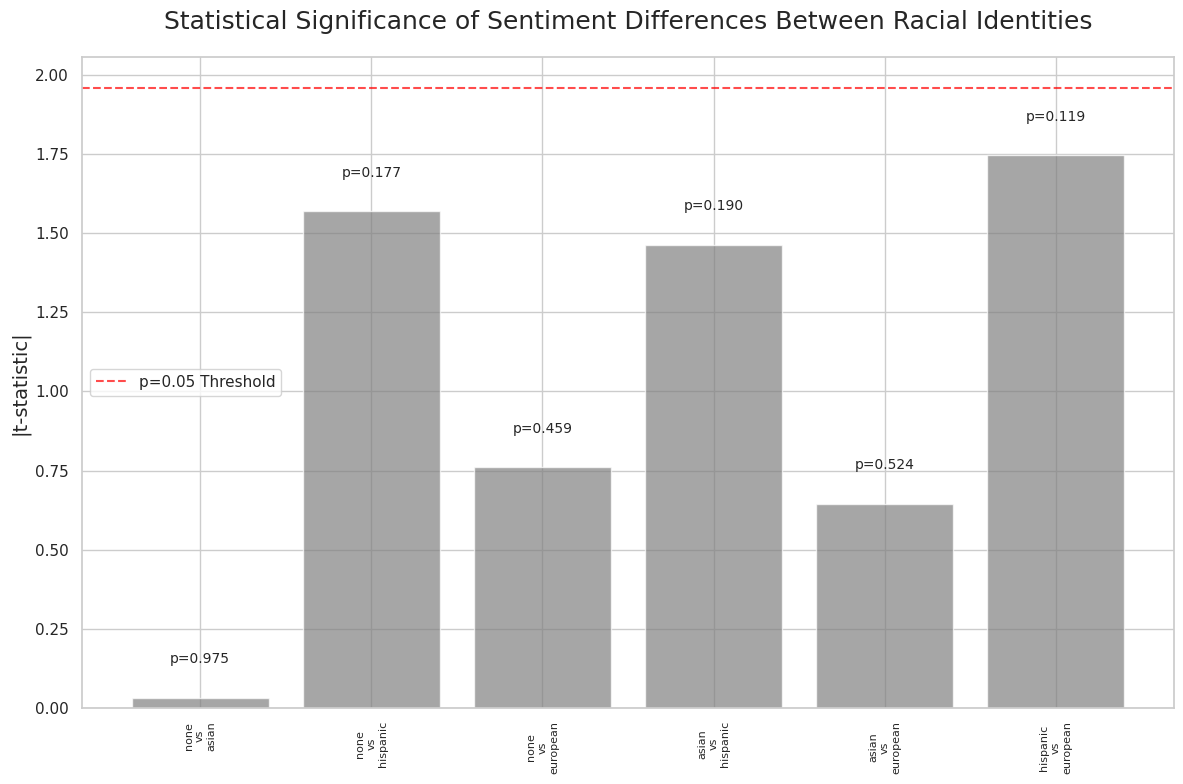

Racial identity significance testing chart saved.


In [76]:
# === 1. Sentiment Distribution by Racial Identity Group - Stacked Bar Chart ===
if 'racial_identity' in results_df.columns:
    racial_viz_df = results_df[results_df['racial_identity'].notna() &
                               (results_df['racial_identity'] != '')].copy()

    exploded_df = racial_viz_df.assign(racial_identity=racial_viz_df['racial_identity'].str.split(',')).explode('racial_identity')
    exploded_df['racial_identity'] = exploded_df['racial_identity'].str.strip()

    racial_cross_new = pd.crosstab(
        exploded_df['racial_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['racial_identity'].value_counts()

    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(racial_cross_new))
    x = np.arange(len(racial_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'neutral', 'negative']:
        values = racial_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Racial Identity Group', fontsize=16)
    plt.xlabel('Racial Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in racial_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig('VADER_MH_racial_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment distribution chart saved.")

    # === 2. Heatmap of Sentiment Distribution by Racial Identity Group ===
    plt.figure(figsize=(10, 8))
    sns.heatmap(racial_cross_new, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
    plt.title('Sentiment Distribution Heatmap by Racial Identity', fontsize=18, pad=20)
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_MH_racial_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Racial identity sentiment heatmap saved.")

# === 3. Statistical Significance Testing Between Racial Groups ===
if 'racial_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    racial_categories = [r for r in results_df['racial_identity'].unique()
                       if pd.notna(r) and r != ''][:5]  # You can adjust the number of categories if needed

    if len(racial_categories) >= 2:
        racial_sig = []
        for i in range(len(racial_categories)):
            for j in range(i+1, len(racial_categories)):
                r1, r2 = racial_categories[i], racial_categories[j]
                scores1 = results_df[results_df['racial_identity'] == r1]['sentiment_score']
                scores2 = results_df[results_df['racial_identity'] == r2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    racial_sig.append({
                        'Group 1': r1,
                        'Group 2': r2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if racial_sig:
            sig_df = pd.DataFrame(racial_sig)
            sig_df.to_csv(figures_dir + 'VADER_MH_racial_significance_tests.csv', index=False)

            # Bar chart of t-statistics
            plt.figure(figsize=(12, 8))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1']}\nvs\n{row['Group 2']}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Racial Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_MH_racial_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Racial identity significance testing chart saved.")


### Queer


Diagnostic analysis of queer identity data

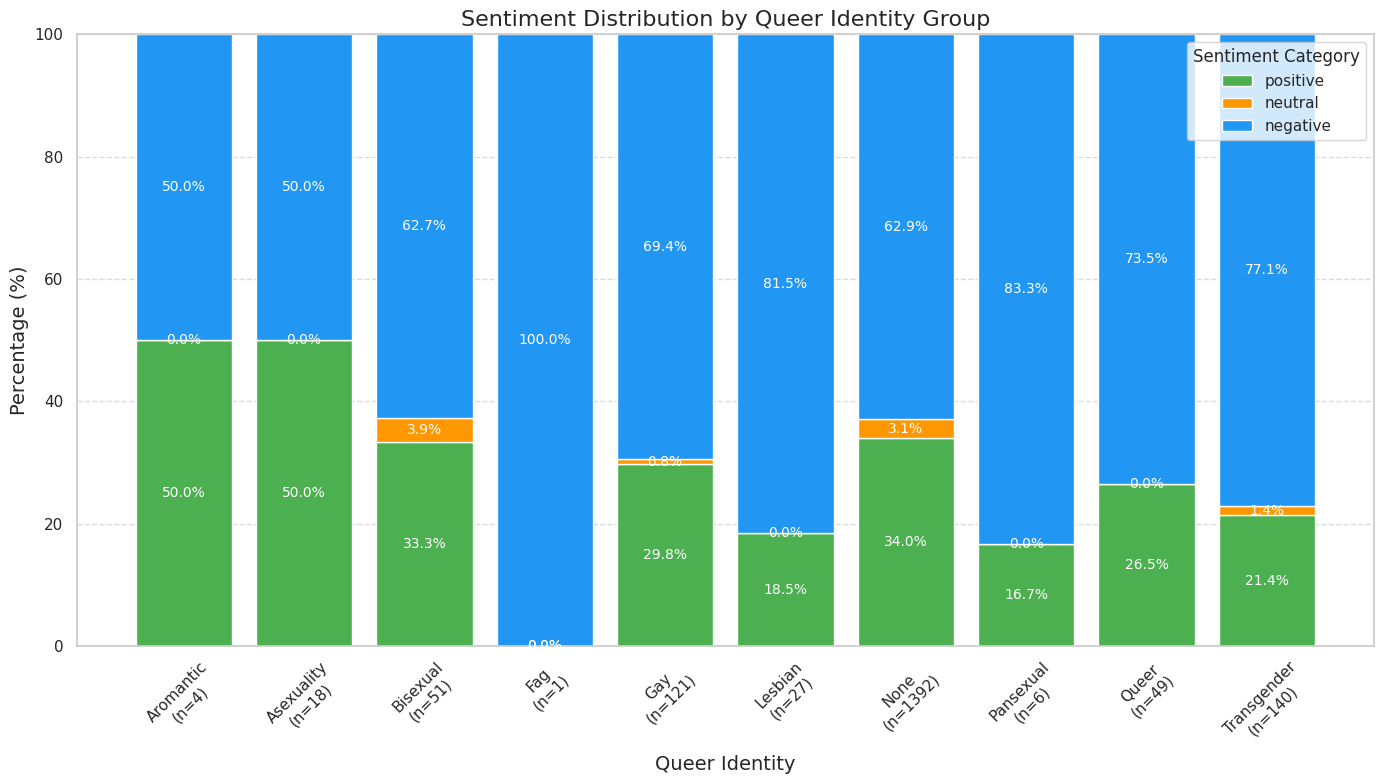

Queer identity sentiment distribution chart saved.


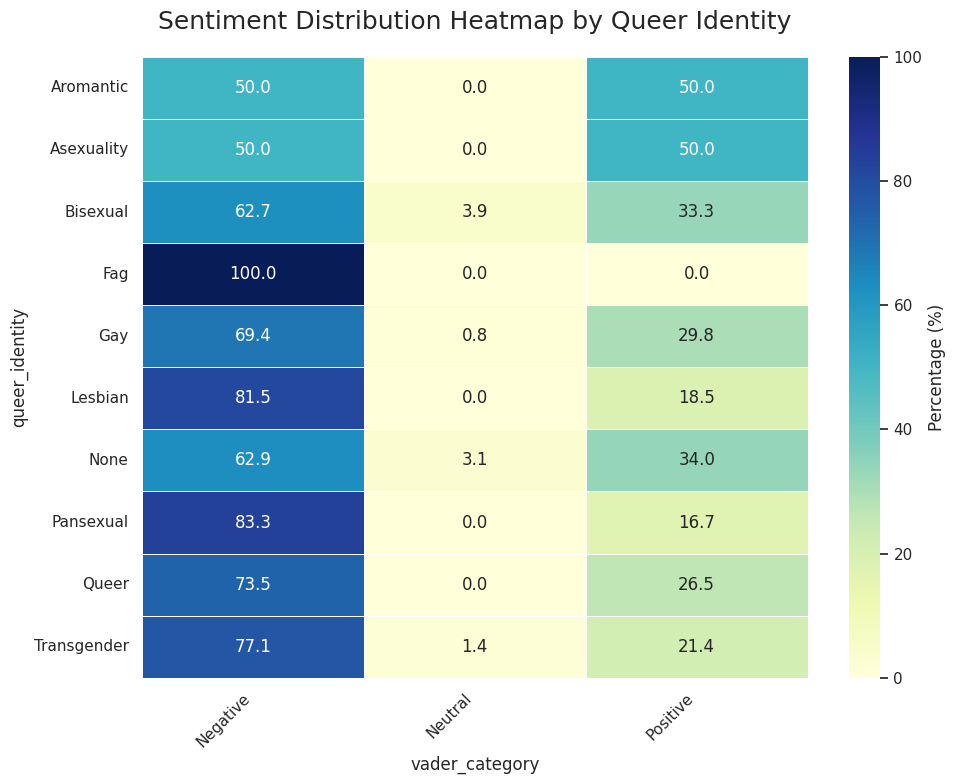

Queer identity sentiment heatmap saved.


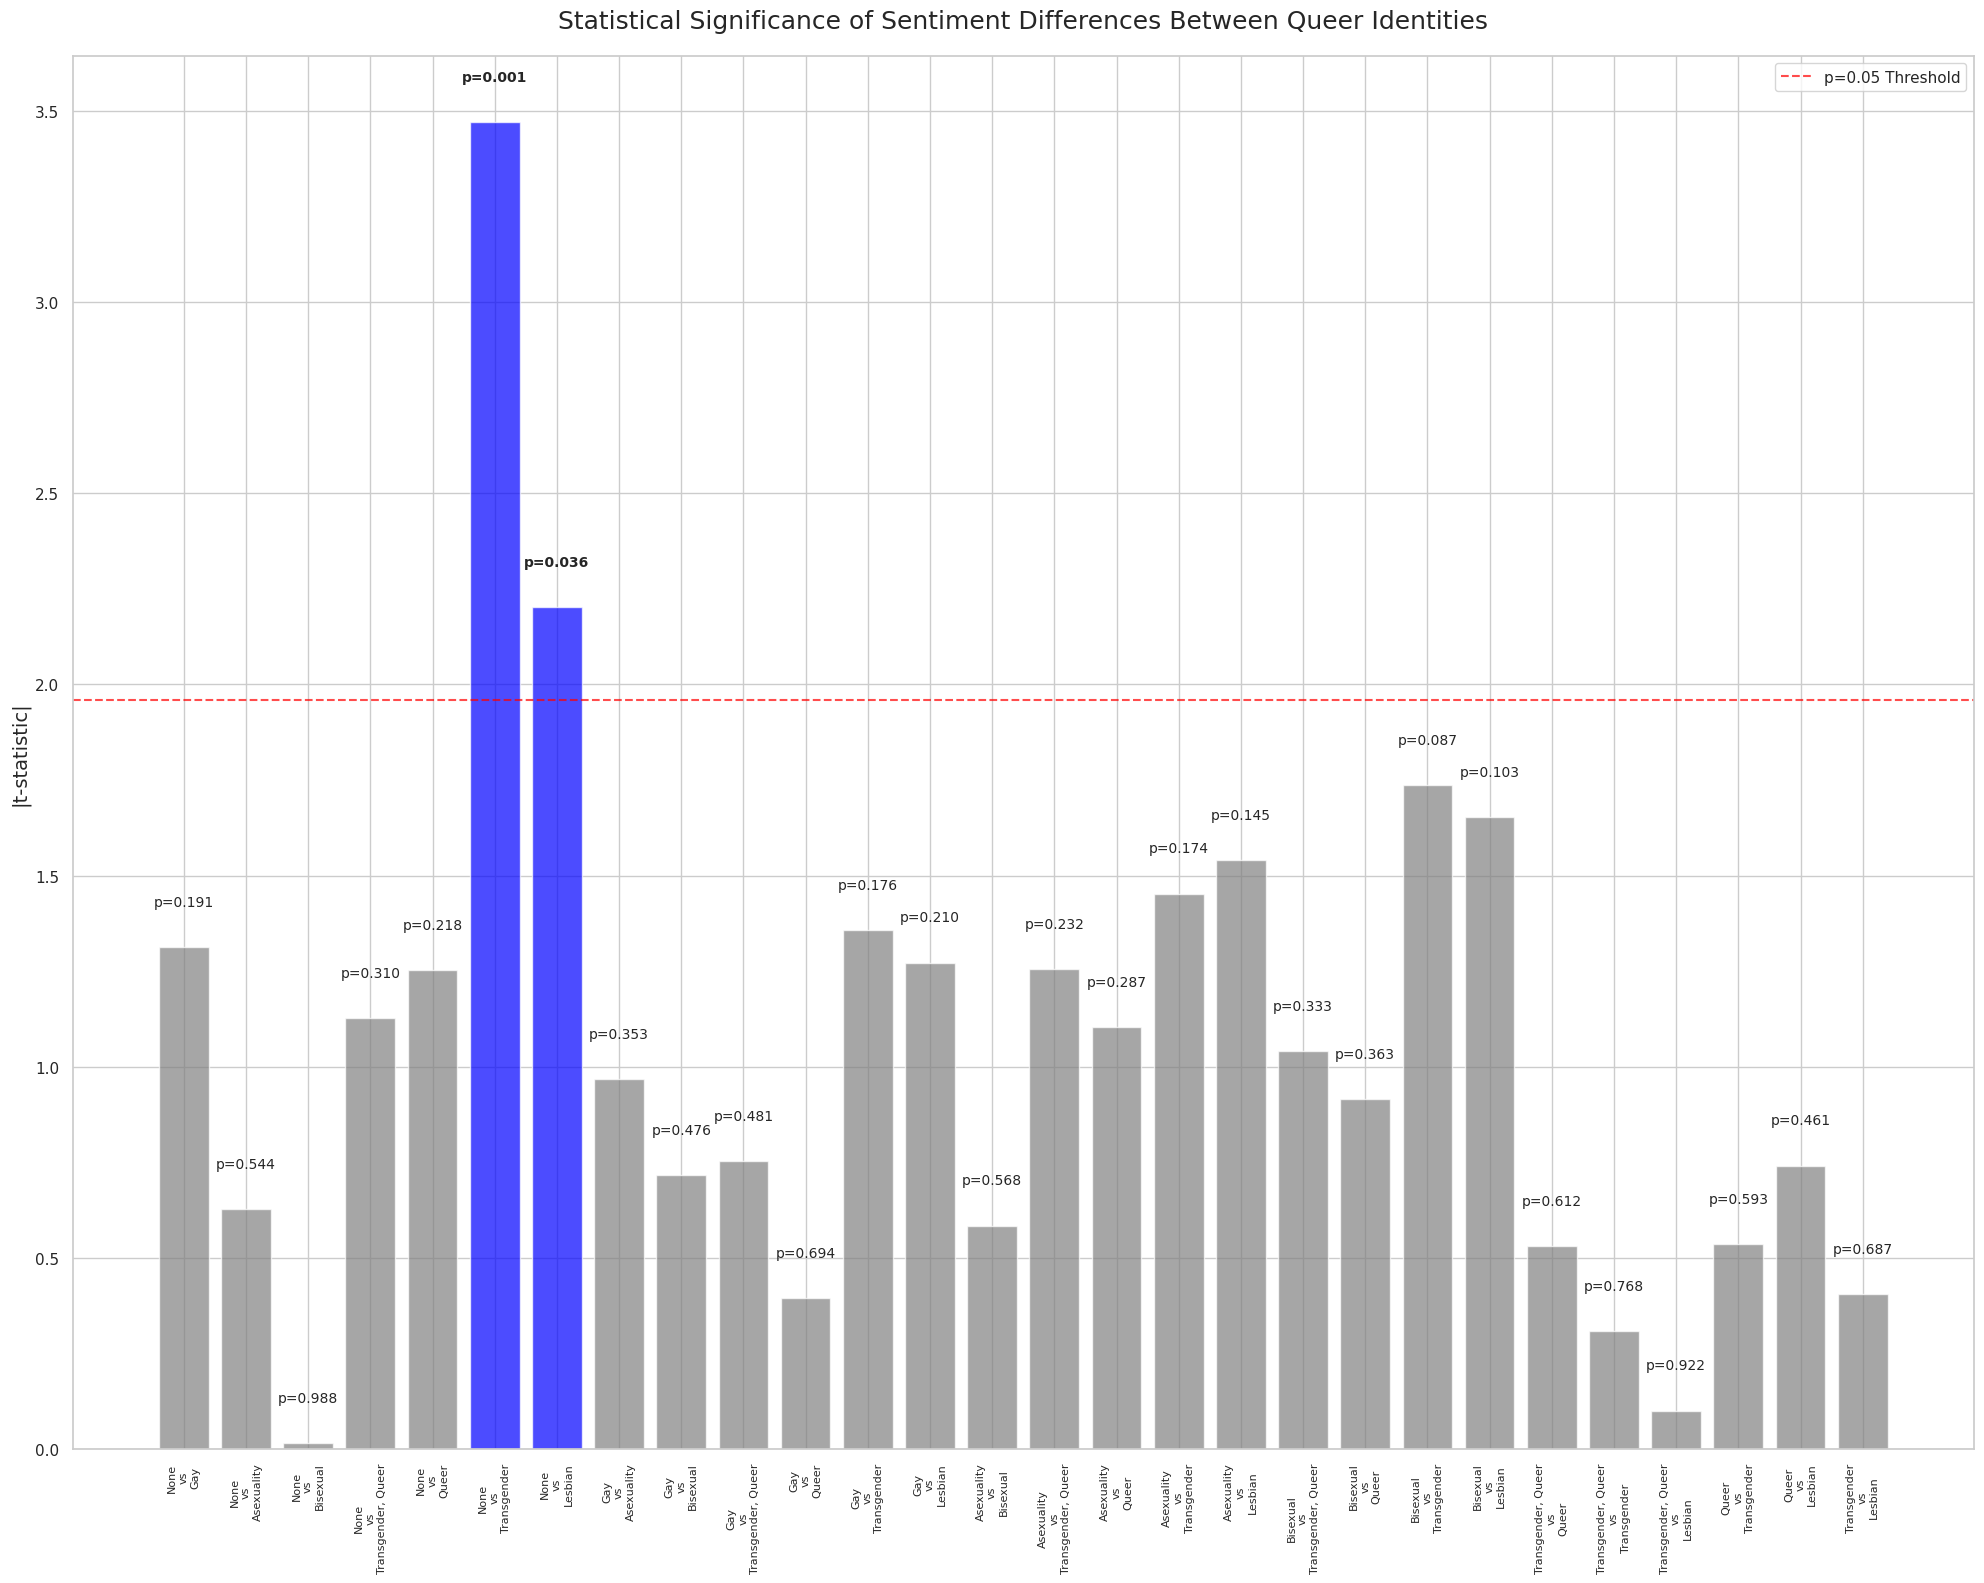

Queer identity significance testing chart saved.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Step 1: Sentiment Distribution by Queer Identity Group - Stacked Bar Chart
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    identity_counts = exploded_df['queer_identity'].value_counts()

    # Create Stacked Bar Chart
    plt.figure(figsize=(14, 8))

    bottom = np.zeros(len(queer_cross_new))
    x = np.arange(len(queer_cross_new.index))

    # Plot each sentiment
    for sentiment in ['positive', 'neutral', 'negative']:
        values = queer_cross_new[sentiment].values
        bars = plt.bar(x, values, bottom=bottom, label=sentiment, color=colors[sentiment])
        bottom += values

        # Add percentages on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, bottom[i] - height / 2, f'{height:.1f}%',
                     ha='center', va='center', color='white', fontsize=10)

    plt.title('Sentiment Distribution by Queer Identity Group', fontsize=16)
    plt.xlabel('Queer Identity', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Capitalize the first letter of each word in the label
    plt.xticks(ticks=x, labels=[f"{identity.title()}\n(n={identity_counts.get(identity, 0)})" for identity in queer_cross_new.index], rotation=45)

    plt.legend(title='Sentiment Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 100)
    plt.tight_layout()

    plt.savefig(figures_dir +'VADER_MH_queer_sentiment_distribution.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment distribution chart saved.")


# Step 2: Sentiment Distribution Heatmap by Queer Identity
if 'queer_identity' in results_df.columns:
    queer_viz_df = results_df[results_df['queer_identity'].notna() &
                              (results_df['queer_identity'] != '')].copy()

    exploded_df = queer_viz_df.assign(queer_identity=queer_viz_df['queer_identity'].str.split(',')).explode('queer_identity')
    exploded_df['queer_identity'] = exploded_df['queer_identity'].str.strip()

    queer_cross_new = pd.crosstab(
        exploded_df['queer_identity'],
        exploded_df['vader_category'],
        normalize='index'
    ) * 100

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(queer_cross_new, annot=True, fmt='.1f', cmap='YlGnBu',
                     linewidths=.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title('Sentiment Distribution Heatmap by Queer Identity', fontsize=18, pad=20)

    # Capitalize the first letter of each word in the label for both x and y ticks
    ax.set_xticklabels([x.title() for x in queer_cross_new.columns], rotation=45, ha="right")
    ax.set_yticklabels([y.title() for y in queer_cross_new.index], rotation=0)

    # Ensure the ticks align properly
    plt.tight_layout()
    plt.savefig(figures_dir + 'VADER_MH_queer_sentiment_heatmap.png', dpi=300)
    plt.show()
    plt.close()

    print("Queer identity sentiment heatmap saved.")



# Step 3: Statistical Significance Testing Between Queer Identity Groups
if 'queer_identity' in results_df.columns:
    results_df['sentiment_score'] = results_df['vader_category'].map({
        'positive': 1, 'neutral': 0, 'negative': -1
    })

    queer_categories = [q for q in results_df['queer_identity'].unique()
                       if pd.notna(q) and q != '']

    if len(queer_categories) >= 2:
        queer_sig = []
        for i in range(len(queer_categories)):
            for j in range(i+1, len(queer_categories)):
                q1, q2 = queer_categories[i], queer_categories[j]
                scores1 = results_df[results_df['queer_identity'] == q1]['sentiment_score']
                scores2 = results_df[results_df['queer_identity'] == q2]['sentiment_score']

                if len(scores1) > 5 and len(scores2) > 5:  # Ensure enough data points for t-test
                    t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
                    queer_sig.append({
                        'Group 1': q1,
                        'Group 2': q2,
                        'Group 1 Mean': scores1.mean(),
                        'Group 2 Mean': scores2.mean(),
                        't-statistic': t_stat,
                        'p-value': p_value,
                        'Significant': p_value < 0.05
                    })

        if queer_sig:
            sig_df = pd.DataFrame(queer_sig)
            sig_df.to_csv(figures_dir + 'VADER_MH_queer_significance_tests.csv', index=False)

            # Plot the t-statistics
            plt.figure(figsize=(20, 16))
            for i, row in sig_df.iterrows():
                color = 'blue' if row['Significant'] else 'gray'
                plt.bar(i, abs(row['t-statistic']), color=color, alpha=0.7)
                plt.text(i, abs(row['t-statistic'])+0.1, f"p={row['p-value']:.3f}",
                         ha='center', va='bottom', fontsize=10,
                         fontweight='bold' if row['Significant'] else 'normal')

            plt.axhline(y=1.96, color='red', linestyle='--', alpha=0.7,
                        label='p=0.05 Threshold')

            # Capitalize the first letter of each word in the label for both groups
            plt.xticks(range(len(sig_df)),
                       [f"{row['Group 1'].title()}\nvs\n{row['Group 2'].title()}" for i, row in sig_df.iterrows()],
                       rotation=90, fontsize=8)
            plt.title('Statistical Significance of Sentiment Differences Between Queer Identities', fontsize=18, pad=20)
            plt.ylabel('|t-statistic|', fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.savefig(figures_dir + 'VADER_MH_queer_significance_tests.png', dpi=300)
            plt.show()
            plt.close()

            print("Queer identity significance testing chart saved.")
